# DA Final project:

# Group 31

# Associations and donatoins in Israel

###  Name of students:
Avishai Haberman<br>
Yuval Cohen<br>
Sapir Sapir<br>

מקור הקובץ נלקח מדאטה גוב

https://data.gov.il/dataset/moj-amutot

<a id='top'></a>

<div>
<img src="https://cdn.aarp.net/content/dam/aarp/aarp_foundation/ways-to-give/1140-ways-to-give-donate-falling-coins-hands.imgcache.rev.web.1000.575.jpg" width="800"/>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objs as go
import plotly.express as px

In [2]:
#קוד שהופך את הטקסט לכתב מראה (כיוון שהדאטה בעברית- שימושי מאוד)
my_list =['שקל חדש', 'אירו', 'דולר ארה~ב', 'פרנק שויצרי', 'אחר', 'לירה שטרלינג',
       'פאונד אנגלי', 'כתר נורבגי', 'כתר דני', 'דולר אוסטרלי', 'דולר קנדי',
       'כתר שוודי', 'שקל', 'פרנק בלגי', 'שקל חדש  (הסכם מסגרת)', 'ין יפני',
       'דינר ירדני']
new_list = []
for word in my_list:
    new_word = word[::-1]
    new_list.append(new_word)
print(new_list)

['שדח לקש', 'וריא', 'ב~הרא רלוד', 'ירציוש קנרפ', 'רחא', 'גנילרטש הריל', 'ילגנא דנואפ', 'יגברונ רתכ', 'ינד רתכ', 'ילרטסוא רלוד', 'ידנק רלוד', 'ידווש רתכ', 'לקש', 'יגלב קנרפ', ')תרגסמ םכסה(  שדח לקש', 'ינפי ןי', 'ינדרי רניד']


In [3]:
text = '10 העמותות המובילות לפי סכום התרומות, שעיקר מימונן מחו"ל'
new_text = text[::-1]
print (new_text)

ל"וחמ ןנומימ רקיעש ,תומורתה םוכס יפל תוליבומה תותומעה 01


העלאת קובץ תרומות מחו"ל (DNT_DF)

In [4]:
#פיצול הקובץ "עמותות רשומות" על מנת שיוכל לעלות 
#הרדמנו את כל השורות כי כבר העלנו את הקובץ :)
# import pandas as pd
# # קובץ CSV המקורי
# input_file = r'C:\Users\yuval\OneDrive\שולחן העבודה\עבודה ניתוח נתונים'
# chunk_size = 50000 
# chunks = pd.read_csv(input_file, chunksize=chunk_size)
# file_number = 1
# for chunk in chunks:
#     output_file = rf'C:\Users\yuval\OneDrive\שולחן העבודה\עבודה ניתוח נתונים{file_number}.csv'
#     chunk.to_csv(output_file, index=False)
#     file_number += 1

# print("הפיצול הושלם בהצלחה!")

In [5]:
#ייבוא הדאטה של תרומות מחו"ל
#DNT_DF = Is the file which describes donations for Israeli associations from aboard.

url_DNT_DF = 'https://raw.githubusercontent.com/YuvalllCohennn/final-project/main/%D7%AA%D7%A8%D7%95%D7%9E%D7%95%D7%AA%20%D7%9E%D7%99%D7%A9%D7%95%D7%AA%20%D7%96%D7%A8%D7%94.csv'
DNT_DF = pd.read_csv(url_DNT_DF)
DNT_DF.head()

,מספר עמותה,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,שער המרה,מטרת תרומה,התנאים לתרומה,שנת תרומה,רבעון תרומה,עיקר מימון תרומות מישות מדינית זרה,Column1
0,580000370,עוז ושלום~ החוג הרעיוני לציונות דתית (ע~ר),29/06/2021,Stichingqnet solidariteits fand,איחוד~ ארגון או חבר של גופים זרים,47416,אירו,3.95,עלון שבת שלום,NaN,2020,ראשון,לא,NaN
1,580000370,עוז ושלום~ החוג הרעיוני לציונות דתית (ע~ר),29/06/2021,Penn Commissie Dienst,איחוד~ ארגון או חבר של גופים זרים,3296,אירו,3.88,עלון שבת שלום,NaN,2020,ראשון,לא,NaN
2,580002053,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות אוסטריה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,4350,אירו,4.23,תמיכה בפסטיבל הסטודנטים,ללא,2018,רביעי,לא,NaN
3,580002053,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות יוון,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,1577,אירו,4.15,כרטיסי טיסה לאמנים משתתפים בפסטיבל הסטודנטים,ללא,2018,רביעי,לא,NaN
4,580002053,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות הונגריה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,7600,אירו,4.20,כרטיסי טיסה אורחים מהונגריה לפסטיבל הסטונדטים,ללא,2018,רביעי,לא,NaN


In [6]:
#העמודות של הדאטה
DNT_DF.columns

Index(['מספר עמותה', 'שם עמותה', 'תאריך קבלת התרומה', 'ישות מדינית זרה תורמת',
       'סוג ישות מדינית זרה תורמת (קוד)', 'סכום התרומה בש~ח', 'מטבע',
       'שער המרה', 'מטרת תרומה', 'התנאים לתרומה', 'שנת תרומה', 'רבעון תרומה',
       'עיקר מימון תרומות מישות מדינית זרה', 'Column1'],
      dtype='object')

In [7]:
DNT_DF.shape

(11304, 14)

In [8]:
#מחיקת עמודות לא רלוונטיות
DNT_DF = DNT_DF.drop(columns=['מספר עמותה', 'רבעון תרומה', 'שער המרה'])
DNT_DF.head()

,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,מטרת תרומה,התנאים לתרומה,שנת תרומה,עיקר מימון תרומות מישות מדינית זרה,Column1
0,עוז ושלום~ החוג הרעיוני לציונות דתית (ע~ר),29/06/2021,Stichingqnet solidariteits fand,איחוד~ ארגון או חבר של גופים זרים,47416,אירו,עלון שבת שלום,NaN,2020,לא,NaN
1,עוז ושלום~ החוג הרעיוני לציונות דתית (ע~ר),29/06/2021,Penn Commissie Dienst,איחוד~ ארגון או חבר של גופים זרים,3296,אירו,עלון שבת שלום,NaN,2020,לא,NaN
2,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות אוסטריה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,4350,אירו,תמיכה בפסטיבל הסטודנטים,ללא,2018,לא,NaN
3,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות יוון,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,1577,אירו,כרטיסי טיסה לאמנים משתתפים בפסטיבל הסטודנטים,ללא,2018,לא,NaN
4,סינמטק תל - אביב (ע~ר),01/07/2019,שגרירות הונגריה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,7600,אירו,כרטיסי טיסה אורחים מהונגריה לפסטיבל הסטונדטים,ללא,2018,לא,NaN


In [9]:
#מציאת עמודות עם תאים ריקים
DNT_DF.isnull().sum()

שם עמותה                                  0
תאריך קבלת התרומה                         0
ישות מדינית זרה תורמת                     0
סוג ישות מדינית זרה תורמת (קוד)           0
סכום התרומה בש~ח                          0
מטבע                                      3
מטרת תרומה                                0
התנאים לתרומה                           830
שנת תרומה                                 0
עיקר מימון תרומות מישות מדינית זרה        0
Column1                               11304
dtype: int64

In [10]:
DNT_DF.dtypes

שם עמותה                               object
תאריך קבלת התרומה                      object
ישות מדינית זרה תורמת                  object
סוג ישות מדינית זרה תורמת (קוד)        object
סכום התרומה בש~ח                        int64
מטבע                                   object
מטרת תרומה                             object
התנאים לתרומה                          object
שנת תרומה                               int64
עיקר מימון תרומות מישות מדינית זרה     object
Column1                               float64
dtype: object

העלאת קובץ עמותות (ASSO_DF)

In [11]:
#העלאת קובץ 1 מהפיצול
url_ASSO1_DF = 'https://raw.githubusercontent.com/YuvalllCohennn/final-project/main/%D7%A2%D7%9E%D7%95%D7%AA%D7%95%D7%AA%20%D7%A8%D7%A9%D7%95%D7%9E%D7%95%D7%AA%20%D7%9E%D7%A4%D7%95%D7%A6%D7%9C%201.csv'
ASSO1_DF = pd.read_csv(url_ASSO1_DF)
ASSO1_DF.head()

C:\Users\yuval\AppData\Local\Temp\ipykernel_21748\735619485.py:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  ASSO1_DF = pd.read_csv(url_ASSO1_DF)


,מספר עמותה,תאריך רישום עמותה,שם עמותה בעברית,שם עמותה באנגלית,תאריך עדכון סטטוס,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,שנת דיווח דוח כספי אחרון,מחזור כספי (הכנסות),...,מספר חברי עמותה,איזורי פעילות,שנת דיווח אחרונה,שם אגודה עותומנית,כתובת - ישוב,כתובת - רחוב,כתובת - מספר דירה,כתובת - מיקוד,מטרות עמותה,Column1
0,580000016,17/05/1981,ארץ - המועצה הציבורית לקידום מחקרים בגיאוגרפיה...,NaN,03/11/2019 07:24,רשומה,מורשת או הנצחה,אחר - מורשת והנצחה,NaN,NaN,...,NaN,NaN,NaN,NaN,תל אביב - יפו,זליג,10,6969352,איסוף כספים לצורך שיפוץ מבנה יד לבנים\r\nבחדר...,NaN
1,580000032,17/12/1981,התנועה ליצירה ולעידוד החיוב בישראל מחיקת עמותה,NaN,06/08/2000 00:00,נמחקה,ספורט,אחר - ספורט,NaN,NaN,...,NaN,NaN,NaN,NaN,תל אביב - יפו,NaN,NaN,0,NaN,NaN
2,580000040,18/05/1981,המרכז למורשת יהדות מוצל (ע~ר),NaN,18/03/2024 00:00,נמחקה,תרבות או אמנות,אחר - תרבות ואומנות,NaN,NaN,...,NaN,NaN,2017.0,NaN,טירת כרמל,ביאליק,36,30250,לעסוק במחקר ובפרסום ספרים~ כתבים וכתבי עת בענ\...,NaN
3,580000057,29/10/1981,אגודה למען הקשיש באילת (ע~ר),NaN,19/11/2000 00:00,רשומה,מורשת או הנצחה,אחר - מורשת והנצחה,2022.0,4124455.0,...,62.0,דרום,2022.0,NaN,אילת,שד ארגמן,83,8804714,פיתןח מפעלי רווחה לקשישים באילת~ מפעלי תרבותוח...,NaN
4,580000065,24/07/1981,אגודת ישראל-מצרים לטיפוח יחסי הבנה בין עמי ישר...,NaN,12/11/1997 00:00,נמחקה,קשרים בינלאומיים,אחר - קשרים בינלאומיים,NaN,NaN,...,NaN,NaN,NaN,NaN,תל אביב - יפו,NaN,NaN,0,NaN,NaN


In [12]:
#העלאת קובץ 2 מהפיצול
url_ASSO2_DF = 'https://raw.githubusercontent.com/YuvalllCohennn/final-project/main/%D7%A2%D7%91%D7%95%D7%93%D7%94%20%D7%A0%D7%99%D7%AA%D7%95%D7%97%20%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D2.csv'
ASSO2_DF = pd.read_csv(url_ASSO2_DF)
ASSO2_DF.head()

,מספר עמותה,תאריך רישום עמותה,שם עמותה בעברית,שם עמותה באנגלית,תאריך עדכון סטטוס,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,שנת דיווח דוח כספי אחרון,מחזור כספי (הכנסות),...,מספר חברי עמותה,איזורי פעילות,שנת דיווח אחרונה,שם אגודה עותומנית,כתובת - ישוב,כתובת - רחוב,כתובת - מספר דירה,כתובת - מיקוד,מטרות עמותה,Column1
0,580588887,11/03/2014,זכרון יהודה דז'יקוב (ע~ר),NaN,11/03/2014 11:17,רשומה,חינוך~ השכלה והכשרה מקצועית,ישיבה – כולל,2017.0,NaN,...,NaN,NaN,2017.0,NaN,ירושלים,צפניה,59,9530143,אחזקה והקמת כולל~ ישיבות מוסדות חינוך ודת. ספר...,NaN
1,580588895,11/03/2014,אמונת התורה (ע~ר),NaN,11/04/2024 13:50,הוגשה בקשת פירוק לבית משפט,חינוך~ השכלה והכשרה מקצועית,ישיבה – כולל,2022.0,7696360.0,...,7.0,NaN,2022.0,NaN,בני ברק,הרב פוברסקי,24,0,להקים ולהחזיק כולל אברכים~ ישיבה~ מוסדות חינוך...,NaN
2,580588903,12/03/2014,קרן עזרה ממיצר (ע~ר),NaN,12/03/2014 08:43,רשומה,חינוך~ השכלה והכשרה מקצועית,אחר - חינוך~ השכלה והכשרה מקצועית,2022.0,17107327.0,...,7.0,NaN,2022.0,NaN,ירושלים,כפר נחום,23,9471823,אחזקת כולל אברכים~ ישיבה~ מוסדות חינוך ודת. אר...,NaN
3,580588911,01/04/2014,עונג שבת ויו~ט (ע~ר),NaN,01/04/2014 09:49,רשומה,שירותי רווחה,אחר - שירותי רווחה,2022.0,17113986.0,...,8.0,NaN,2022.0,NaN,ירושלים,הושע,3,9578403,הגשת עזרה וסיוע לבני תורה ונזקקים~ בחלוקת מצרכ...,NaN
4,580588929,27/03/2014,עולם האחדות (ע~ר),NaN,18/03/2024 00:00,נמחקה,חינוך~ השכלה והכשרה מקצועית,ישיבה – כולל,2016.0,NaN,...,NaN,NaN,2016.0,NaN,ירושלים,צונדק,22-מרץ,0,פעילות לאחדות עם ישראל וקירוב לבבות ע~י שיעורי...,NaN


In [13]:
#איחוד 2 הקבצים המפוצלים לקובץ 1
url1 = 'https://raw.githubusercontent.com/YuvalllCohennn/final-project/main/%D7%A2%D7%9E%D7%95%D7%AA%D7%95%D7%AA%20%D7%A8%D7%A9%D7%95%D7%9E%D7%95%D7%AA%20%D7%9E%D7%A4%D7%95%D7%A6%D7%9C%201.csv'
url2 = 'https://raw.githubusercontent.com/YuvalllCohennn/final-project/main/%D7%A2%D7%91%D7%95%D7%93%D7%94%20%D7%A0%D7%99%D7%AA%D7%95%D7%97%20%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D2.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
ASSO_DF = pd.concat([df1, df2], ignore_index=True)

ASSO_DF.head()

C:\Users\yuval\AppData\Local\Temp\ipykernel_21748\3968342470.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(url1)


,מספר עמותה,תאריך רישום עמותה,שם עמותה בעברית,שם עמותה באנגלית,תאריך עדכון סטטוס,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,שנת דיווח דוח כספי אחרון,מחזור כספי (הכנסות),...,מספר חברי עמותה,איזורי פעילות,שנת דיווח אחרונה,שם אגודה עותומנית,כתובת - ישוב,כתובת - רחוב,כתובת - מספר דירה,כתובת - מיקוד,מטרות עמותה,Column1
0,580000016,17/05/1981,ארץ - המועצה הציבורית לקידום מחקרים בגיאוגרפיה...,NaN,03/11/2019 07:24,רשומה,מורשת או הנצחה,אחר - מורשת והנצחה,NaN,NaN,...,NaN,NaN,NaN,NaN,תל אביב - יפו,זליג,10,6969352,איסוף כספים לצורך שיפוץ מבנה יד לבנים\r\nבחדר...,NaN
1,580000032,17/12/1981,התנועה ליצירה ולעידוד החיוב בישראל מחיקת עמותה,NaN,06/08/2000 00:00,נמחקה,ספורט,אחר - ספורט,NaN,NaN,...,NaN,NaN,NaN,NaN,תל אביב - יפו,NaN,NaN,0,NaN,NaN
2,580000040,18/05/1981,המרכז למורשת יהדות מוצל (ע~ר),NaN,18/03/2024 00:00,נמחקה,תרבות או אמנות,אחר - תרבות ואומנות,NaN,NaN,...,NaN,NaN,2017.0,NaN,טירת כרמל,ביאליק,36,30250,לעסוק במחקר ובפרסום ספרים~ כתבים וכתבי עת בענ\...,NaN
3,580000057,29/10/1981,אגודה למען הקשיש באילת (ע~ר),NaN,19/11/2000 00:00,רשומה,מורשת או הנצחה,אחר - מורשת והנצחה,2022.0,4124455.0,...,62.0,דרום,2022.0,NaN,אילת,שד ארגמן,83,8804714,פיתןח מפעלי רווחה לקשישים באילת~ מפעלי תרבותוח...,NaN
4,580000065,24/07/1981,אגודת ישראל-מצרים לטיפוח יחסי הבנה בין עמי ישר...,NaN,12/11/1997 00:00,נמחקה,קשרים בינלאומיים,אחר - קשרים בינלאומיים,NaN,NaN,...,NaN,NaN,NaN,NaN,תל אביב - יפו,NaN,NaN,0,NaN,NaN


In [14]:
ASSO_DF = ASSO_DF.drop(columns=['תאריך עדכון סטטוס', 'שנת דיווח דוח כספי אחרון', 'מספר חברי עמותה','שם אגודה עותומנית', 'כתובת - רחוב','Column1', 'כתובת - מספר דירה', 'כתובת - מיקוד',  'שם עמותה באנגלית','כתובת - רחוב', 'מספר עמותה'])
ASSO_DF.head()

,תאריך רישום עמותה,שם עמותה בעברית,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,מחזור כספי (הכנסות),סך הוצאות העמותה,כמות מתנדבים,כמות עובדים,איזורי פעילות,שנת דיווח אחרונה,כתובת - ישוב,מטרות עמותה
0,17/05/1981,ארץ - המועצה הציבורית לקידום מחקרים בגיאוגרפיה...,רשומה,מורשת או הנצחה,אחר - מורשת והנצחה,NaN,0,NaN,NaN,NaN,NaN,תל אביב - יפו,איסוף כספים לצורך שיפוץ מבנה יד לבנים\r\nבחדר...
1,17/12/1981,התנועה ליצירה ולעידוד החיוב בישראל מחיקת עמותה,נמחקה,ספורט,אחר - ספורט,NaN,0,NaN,NaN,NaN,NaN,תל אביב - יפו,NaN
2,18/05/1981,המרכז למורשת יהדות מוצל (ע~ר),נמחקה,תרבות או אמנות,אחר - תרבות ואומנות,NaN,0,NaN,NaN,NaN,2017.0,טירת כרמל,לעסוק במחקר ובפרסום ספרים~ כתבים וכתבי עת בענ\...
3,29/10/1981,אגודה למען הקשיש באילת (ע~ר),רשומה,מורשת או הנצחה,אחר - מורשת והנצחה,4124455.0,596221,11.0,23.0,דרום,2022.0,אילת,פיתןח מפעלי רווחה לקשישים באילת~ מפעלי תרבותוח...
4,24/07/1981,אגודת ישראל-מצרים לטיפוח יחסי הבנה בין עמי ישר...,נמחקה,קשרים בינלאומיים,אחר - קשרים בינלאומיים,NaN,0,NaN,NaN,NaN,NaN,תל אביב - יפו,NaN


In [15]:
#מציאת עמודות עם תאים ריקים
ASSO_DF.isnull().sum()

תאריך רישום עמותה        910
שם עמותה בעברית            2
סטטוס עמותה                0
סיווג פעילות ענפי        125
תחום פעילות משני         125
מחזור כספי (הכנסות)    44498
סך הוצאות העמותה           0
כמות מתנדבים           44539
כמות עובדים            44539
איזורי פעילות          63836
שנת דיווח אחרונה       40356
כתובת - ישוב             264
מטרות עמותה             2542
dtype: int64

In [16]:
#מציאת טיפוסי העמודות
ASSO_DF.dtypes

תאריך רישום עמותה       object
שם עמותה בעברית         object
סטטוס עמותה             object
סיווג פעילות ענפי       object
תחום פעילות משני        object
מחזור כספי (הכנסות)    float64
סך הוצאות העמותה         int64
כמות מתנדבים           float64
כמות עובדים            float64
איזורי פעילות           object
שנת דיווח אחרונה       float64
כתובת - ישוב            object
מטרות עמותה             object
dtype: object

### פרק 1- מקורות התרומות מחו"ל

In [17]:
#  היחס בין סוג מטבע לסכום כסף ע"י קיבוץ 
grouped_coint = DNT_DF.groupby('מטבע').agg({
    'סכום התרומה בש~ח': 'sum',
    'ישות מדינית זרה תורמת': lambda x: ', '.join(x)}).reset_index()

grouped_coint.head()

,מטבע,סכום התרומה בש~ח,ישות מדינית זרה תורמת
0,אחר,21720819,"קנדה, אין, אין, אין, אנגליה, אנגליה, שוויץ, שג..."
1,אירו,3138111267,"Stichingqnet solidariteits fand, Penn Commissi..."
2,דולר אוסטרלי,701560,"ממשלת אוסטרליה, ממשלת אוסטרליה, ממשלת אוסטרליה..."
3,דולר ארה~ב,613352417,"שגרירות ארה~ב, שגרירות ארה~ב, שגרירות מקסיקו, ..."
4,דולר קנדי,3909245,"שגרירות קנדה, קנדה, קנדה, GVT Canada, Public W..."


In [18]:
DNT_DF['מטבע'].value_counts().index

Index(['שקל חדש', 'אירו', 'דולר ארה~ב', 'פרנק שויצרי', 'אחר', 'לירה שטרלינג',
       'פאונד אנגלי', 'כתר נורבגי', 'כתר דני', 'דולר אוסטרלי', 'דולר קנדי',
       'כתר שוודי', 'שקל', 'פרנק בלגי', 'שקל חדש  (הסכם מסגרת)', 'ין יפני',
       'דינר ירדני'],
      dtype='object', name='מטבע')

In [19]:
#ארגונים זרים שתרמו יותר מ100 תרומות
value_counts = DNT_DF['ישות מדינית זרה תורמת'].value_counts()
filtered_value_counts = value_counts[value_counts > 100]
print(filtered_value_counts)

ישות מדינית זרה תורמת
USAID                        300
שגרירות ארה~ב                194
האיחוד האירופי               189
קרן רוזה לוקסמבורג           188
Norwegian Refugee Council    161
שגרירות ארצות הברית          144
UNDP                         139
Bread for the World          125
Broederlijk Delen            108
Name: count, dtype: int64


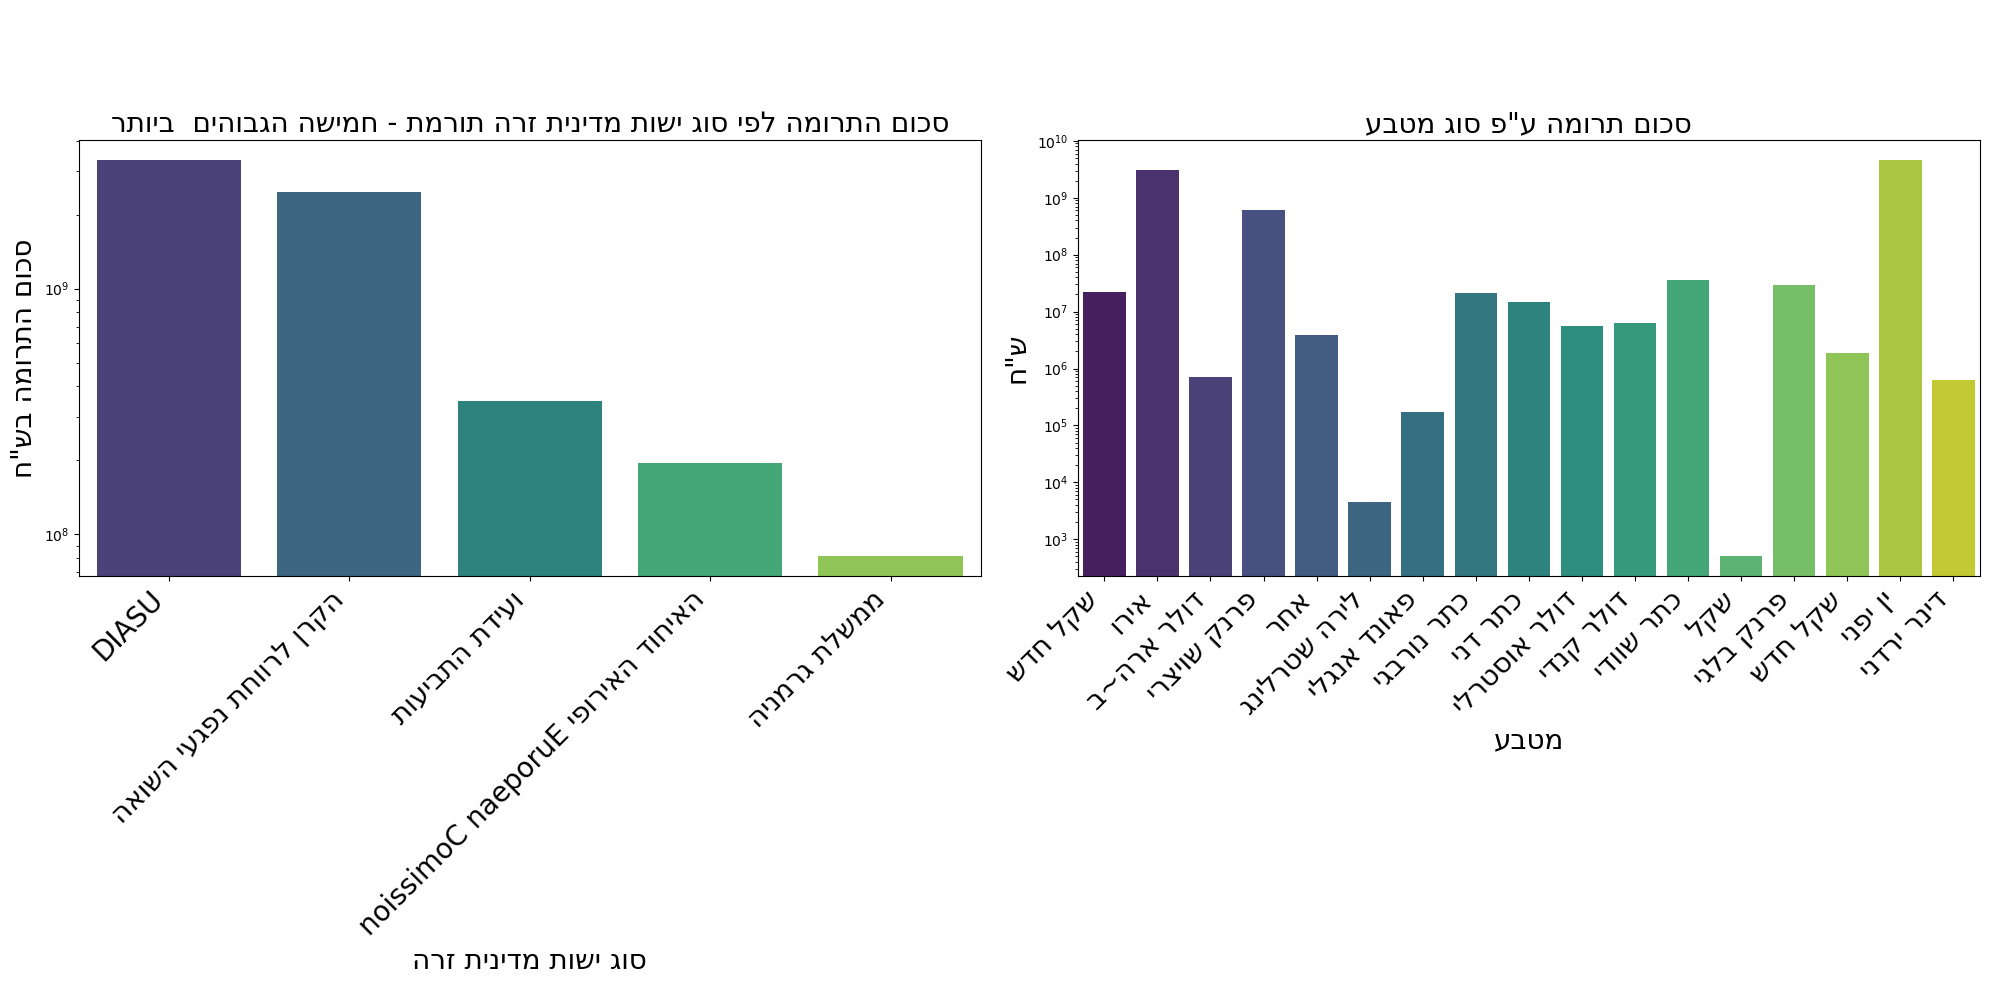

In [20]:
#גרפים סכום עפ"י מטבע וסכום עפ"י ארגון
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle(' ', fontsize=30)

DNT_top = DNT_DF.groupby('ישות מדינית זרה תורמת')['סכום התרומה בש~ח'].sum().nlargest(5)
sns.barplot(x=DNT_top.index, y=DNT_top.values, palette='viridis', ax=ax1)
labels = ['DIASU', 'האושה יעגפנ תחוורל ןרקה', 'תועיבתה תדיעו', 'noissimoC naeporuE יפוריאה דוחיאה', 'הינמרג תלשממ']
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=20)
ax1.set_title('רתויב  םיהובגה השימח - תמרות הרז תינידמ תושי גוס יפל המורתה םוכס', fontsize=20)
ax1.set_xlabel('הרז תינידמ תושי גוס', fontsize=20)
ax1.set_ylabel('ח"שב המורתה םוכס', fontsize=20)
ax1.set_yscale("log")


sns.barplot(x='מטבע', y='סכום התרומה בש~ח', data=grouped_coint, palette='viridis', ax=ax2)
labels = ['שדח לקש', 'וריא', 'ב~הרא רלוד', 'ירציוש קנרפ', 'רחא', 'גנילרטש הריל', 'ילגנא דנואפ', 'יגברונ רתכ', 'ינד רתכ', 'ילרטסוא רלוד', 'ידנק רלוד', 'ידווש רתכ', 'לקש', 'יגלב קנרפ', '  שדח לקש', 'ינפי ןי', 'ינדרי רניד'] 
ax2.set_xticklabels(labels, rotation=45 , ha='right',fontsize=20)
ax2.set_title('עבטמ גוס פ"ע המורת םוכס', fontsize=20)
ax2.set_xlabel('עבטמ', fontsize=20)
ax2.set_ylabel('ח"ש', fontsize=20)
ax2.set_yscale("log")


plt.tight_layout(rect=[0, 0, 1, 0.95])  # התאמת המיקום של כל הגרפים ביחס לכותרת הראשית
plt.show()



 הסתכלנו על אירגונים שתרמו יותר מ40 תרומות לעמותות בארץ ובעזרת ה CHAT GPT הוצאנו את המדינה המשוייכת לכל אירגון, סכמנו את מספר תרומות המשוייכות לכל מדינה, והנו רשימת מדינות תורמות לפי כמות הפעמים שתרומות מהן הגיעו לישראל, על מנת להראות מאיזה מדינות יש תמיכה כלכלית לעמותות בישראל, וכמה באופן יחסי. נציג במפת העולם את פיזור התרומות, ככל שצבע המדינה כהה יותר מקבלים יותר תרומות. 

In [21]:
#הוצאת האירגונים התורמים ומשם המדינות התורמות 
value_counts_countries = DNT_DF['ישות מדינית זרה תורמת'].value_counts()
filtered_value_counts_countries = value_counts_countries[value_counts_countries > 40]
filtered_value_counts_countries

ישות מדינית זרה תורמת
USAID                                      300
שגרירות ארה~ב                              194
האיחוד האירופי                             189
קרן רוזה לוקסמבורג                         188
Norwegian Refugee Council                  161
שגרירות ארצות הברית                        144
UNDP                                       139
Bread for the World                        125
Broederlijk Delen                          108
UNHCR                                       93
US Disbursing Officer- American Embassy     92
קרן היינריך בל                              91
Trocaire                                    70
קרן פרידריך אברט                            68
שגרירות גרמניה                              68
Misereor                                    63
The European Commission                     63
MEPI                                        60
Catholic Relief Services                    54
EU                                          53
ממשלת גרמניה                          

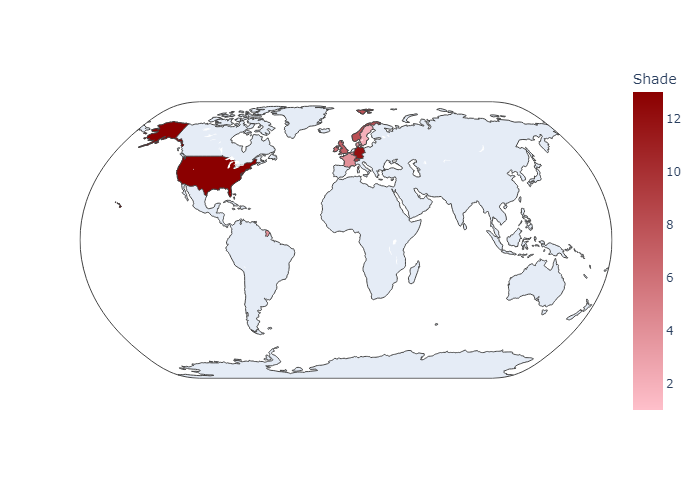

In [22]:
#מפת העולם שמציגה את המדינות מהן מגיעות הרבה תרומות לעמותות בארץ
data_countries = {
'Contries': ['United States','Germany','European Union','UN','Switzerland','Norway','United Kingdom','Ireland','Belgium','France','Denmark','Sweden','Unknown']
}
DONOR_COUNTRIES = pd.DataFrame(data_countries)
DONOR_COUNTRIES['Shade'] = range(len(DONOR_COUNTRIES), 0, -1)
fig = px.choropleth(DONOR_COUNTRIES, 
                    locations="Contries",
                    color="Shade",
                    color_continuous_scale=[[0, "pink"], [1, "darkred"]],
                    locationmode="country names",
                    projection="natural earth")
fig.show(renderer="png")

הגענו למסקנה שרוב התרומות מישות זרה לעמותות בארץ מגיעות מארצות הברית ואירופה- בעיקר מגרמניה. עשינו גוונים במפה כדי להראות את התפלגות מקורות התרומות.

______________________________________
אנחנו רואים שמגרמניה מגיעות תרומות משמעותיות ורצינו לחקור לעומק את יעד התרומות.

In [23]:
sources_germany_values = ['קרן רוזה לוקסמבורג','קרן היינריך בל','קרן פרידריך אברט','שגרירות גרמניה','ממשלת גרמניה','קרן פרידריך אברט בישראל']
DNT_GERMANY_DF = DNT_DF[DNT_DF['ישות מדינית זרה תורמת'].isin(sources_germany_values)]
DNT_GERMANY_DF.head()

,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,מטרת תרומה,התנאים לתרומה,שנת תרומה,עיקר מימון תרומות מישות מדינית זרה,Column1
27,סינמטק תל - אביב (ע~ר),14/08/2018,שגרירות גרמניה,מדינה זרה,4680,שקל חדש,פסטיבל הסטודנטים,פסטיבל הסטודנטים,2017,לא,NaN
168,האגודה לזכויות האזרח בישראל (ע~ר),23/07/2020,קרן פרידריך אברט,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,28000,שקל חדש,פרויקט בנושא זכויות אדם בעידן הדיגיטלי,לבצע את הפרויקט,2020,לא,NaN
704,אשה לאשה מרכז פמיניסטי חיפה (ע~ר),19/07/2018,קרן רוזה לוקסמבורג,איחוד~ ארגון או חבר של מדינות זרות,12864,שקל חדש,פרויקט ליגה פמיניסטיות נשים דוברות רוסית - המט...,קידום חשיבה פמיניסטית ואקטיביזם בקרב נשים דובר...,2018,לא,NaN
706,אשה לאשה מרכז פמיניסטי חיפה (ע~ר),19/07/2018,קרן רוזה לוקסמבורג,איחוד~ ארגון או חבר של מדינות זרות,10720,שקל חדש,לפרוייקט -האקדח על שולחן המטבח.,פעילות ציבורית בעניין סכנה של נשק חם והקשר בפג...,2018,לא,NaN
707,אשה לאשה מרכז פמיניסטי חיפה (ע~ר),19/07/2018,קרן רוזה לוקסמבורג,איחוד~ ארגון או חבר של מדינות זרות,1500,שקל חדש,לפרוייקט -האקדח על שולחן המטבח.,פעילות ציבורית בעניין סכנה של נשק חם והקשר בפג...,2018,לא,NaN


In [24]:
DNT_GERMANY_DF['שם עמותה'].value_counts().index

Index(['מרכז מאקרו לכלכלה מדינית (ע~ר)', 'מרכז אדוה (ע~ר)',
       'הקרן לרווחת נפגעי השואה (ע~ר)',
       'תשע שבע שתיים - לקידום עיתונאות אזרחית (ע~ר)',
       'ארטים~ צוות אמנות בין תחומית (ע~ר)',
       'אשה לאשה מרכז פמיניסטי חיפה (ע~ר)',
       'מולד - המרכז להתחדשות הדמוקרטיה בע~מ (חל~צ)', 'מרכז השל לקיימות (ע~ר)',
       'מורשתנו - הצהרה דמוקרטית (ע~ר)', 'קו לעובד (ע~ר)',
       'פורום דו קיום בנגב (ע~ר)', 'המרכז לפיתוח יוזמות שלום (ע~ר)',
       'הקרן לשיתוף פעולה כלכלי  (ע~ר)  THE ECONOMIC COOPERATION FOUNDATION (R.A.)',
       'עומדים ביחד בע~מ (חל~צ)', 'האנשים תחילה  (ע~ר)',
       'ח.ל. חינוך לשלום בע~מ (חל~צ)', 'המוקד לפליטים ולמהגרים (ע~ר)',
       'הפורום לחשיבה אזורית (ע~ר)', 'המרכז הערבי לתכנון אלטרנטיבי (ע~ר)',
       'כרם נבות בע~מ (חל~צ)', 'איתך- מעכי- משפטניות למען צדק חברתי (ע~ר)',
       'מדה אלכרמל - המרכז הערבי למחקר חברתי ויישומי (ע~ר)',
       'המרכז הבין-תרבותי לירושלים (ע~ר) (JERUSALEM INTER-CULTURAL CENTER (R.A',
       'יוזמות אברהם (ע~ר)', 'העמותה לצדק 

In [25]:
asso_germany_values = ['מרכז מאקרו לכלכלה מדינית (ע~ר)', 'מרכז אדוה (ע~ר)',
       'הקרן לרווחת נפגעי השואה (ע~ר)',
       'תשע שבע שתיים - לקידום עיתונאות אזרחית (ע~ר)',
       'ארטים~ צוות אמנות בין תחומית (ע~ר)',
       'אשה לאשה מרכז פמיניסטי חיפה (ע~ר)',
       'מולד - המרכז להתחדשות הדמוקרטיה בע~מ (חל~צ)', 'מרכז השל לקיימות (ע~ר)',
       'מורשתנו - הצהרה דמוקרטית (ע~ר)', 'קו לעובד (ע~ר)',
       'פורום דו קיום בנגב (ע~ר)', 'המרכז לפיתוח יוזמות שלום (ע~ר)',
       'הקרן לשיתוף פעולה כלכלי  (ע~ר)  THE ECONOMIC COOPERATION FOUNDATION (R.A.)',
       'עומדים ביחד בע~מ (חל~צ)', 'האנשים תחילה  (ע~ר)',
       'ח.ל. חינוך לשלום בע~מ (חל~צ)', 'המוקד לפליטים ולמהגרים (ע~ר)',
       'הפורום לחשיבה אזורית (ע~ר)', 'המרכז הערבי לתכנון אלטרנטיבי (ע~ר)',
       'כרם נבות בע~מ (חל~צ)', 'איתך- מעכי- משפטניות למען צדק חברתי (ע~ר)',
       'מדה אלכרמל - המרכז הערבי למחקר חברתי ויישומי (ע~ר)',
       'המרכז הבין-תרבותי לירושלים (ע~ר) (JERUSALEM INTER-CULTURAL CENTER (R.A',
       'יוזמות אברהם (ע~ר)', 'העמותה לצדק סביבתי (ע~ר)',
       'רופאים לזכויות אדם - ישראל  (ע~ר)',
       'סדאקה רעות - שותפות נוער ערבי יהודי (ע~ר)',
       'חברת מוסדות חנוך~ תרבות ושקום שכונות בתל-אביב~ מיסודה של הסוכנות היהודית לא~י בע~מ (חל~צ)',
       'לוחמים לשלום בע~מ (חל~צ)', 'פוטו ישראל בע~מ (חל~צ)',
       '~אגודת יהודי אתיופיה~ (ע~ר)', 'הקרן למגיני זכויות אדם בע~מ (חל~צ)',
       'אחותי - למען נשים בישראל (ע~ר)',
       'עמותת המרכז הישראלי להגירה בינלאומית ולקליטה (ע~ר)',
       'הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)',
       'מכון ליאו בק ירושלים לתולדות יהודי גרמניה ותרבותם  (ע~ר)',
       'כוח לעובדים - ארגון עובדים דמוקרטי (ע~ר)',
       'שחרית - יוצרים מחנה משותף (ע~ר)', 'במקום - תכנון וזכויות אדם (ע~ר)',
       'וילפריד ישראל חברה לאמנות וידיעת המזרח בע~מ (חל~צ)',
       'חלונות - אפיקים לתקשורת (ע~ר)',
       'שיח חדש - למען השיח הדמוקרטי והרב תרבותי בישראל (ע~ר)',
       'מוזיאון ישראל (חל~צ)',
       'הטלוויזיה החברתית - לקידום סדר יום חברתי בישראל בע~מ (חל~צ)',
       'א.ס.ף. - ארגון סיוע לפליטים ומבקשי מקלט בישראל (ע~ר)',
       'מרכז ~מוסאוא~ לזכויות האזרחים הערבים בישראל (ע~ר)',
       'עמותת כ~ן - כוח נשים לקידום מנהיגות נשים בישראל (ע~ר)',
       'האגודה לזכויות האזרח בישראל (ע~ר)',
       'העמותה לקידום לימודי כלכלה וחברה (ע~ר)', 'סינמטק תל - אביב (ע~ר)']

In [26]:
ACTIVE_ASSO_GERMANY = ASSO_DF[ASSO_DF['שם עמותה בעברית'].isin(asso_germany_values)]
ACTIVE_ASSO_GERMANY.head()

,תאריך רישום עמותה,שם עמותה בעברית,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,מחזור כספי (הכנסות),סך הוצאות העמותה,כמות מתנדבים,כמות עובדים,איזורי פעילות,שנת דיווח אחרונה,כתובת - ישוב,מטרות עמותה
185,12/01/1982,סינמטק תל - אביב (ע~ר),רשומה,תרבות או אמנות,אחר - תרבות ואומנות,21856998.0,0,0.0,71.0,NaN,2022.0,תל אביב - יפו,העמקת תודעת אמנות הקולנוע בקרב הציבור הרחב. לש...
1029,26/01/1983,האגודה לזכויות האזרח בישראל (ע~ר),רשומה,ארגוני סנגור~ שינוי חברתי ופוליטי,אחר - ארגוני סנגור~ שינוי חברתי ופוליטי,9572665.0,0,10.0,49.0,NaN,2022.0,תל אביב - יפו,לפעול למען הגנה על זכויות האדם והאזרח בישראל~ ...
4346,17/07/1983,אשה לאשה מרכז פמיניסטי חיפה (ע~ר),רשומה,שירותי רווחה,אחר - שירותי רווחה,1464938.0,263514,25.0,9.0,חיפה~צפון,2022.0,חיפה,קידום מעמד וזכויות נשים ונערות וקידום ביטחון~ ...
11570,01/12/1992,רופאים לזכויות אדם - ישראל (ע~ר),רשומה,בריאות או הצלת חיים,בתי חולים ומוסדות רפואיים,15373749.0,1051644,375.0,36.0,יהודה ושומרון~דרום,2022.0,תל אביב - יפו,לחנך לדו-קיום בשלום ולשיתוף פעולה בין רופאים\r...
12726,15/04/1991,מרכז אדוה (ע~ר),רשומה,קהילה וחברה,אחר - קהילה וחברה,2132839.0,0,0.0,16.0,NaN,2022.0,תל אביב - יפו,לפעול לקידום השוויון החברתי בין המינים~ העדות\...


In [27]:
ACTIVE_ASSO_GERMANY['סיווג פעילות ענפי'].value_counts().index

Index(['קהילה וחברה', 'חינוך~ השכלה והכשרה מקצועית', 'תרבות או אמנות',
       'ארגוני סנגור~ שינוי חברתי ופוליטי', 'שירותי רווחה',
       'מחקר~ מדע וטכנולוגיה', 'בריאות או הצלת חיים', 'קשרים בינלאומיים',
       'שיכון ופיתוח עירוני', 'איגודים מקצועיים', 'מורשת או הנצחה'],
      dtype='object', name='סיווג פעילות ענפי')

In [28]:
#גרף סיווג עמותות שגרמניה תורמת להם במיוחד
DNT_GERMANY_DF['שם עמותה'].value_counts().head(10).index

Index(['מרכז מאקרו לכלכלה מדינית (ע~ר)', 'מרכז אדוה (ע~ר)',
       'הקרן לרווחת נפגעי השואה (ע~ר)',
       'תשע שבע שתיים - לקידום עיתונאות אזרחית (ע~ר)',
       'ארטים~ צוות אמנות בין תחומית (ע~ר)',
       'אשה לאשה מרכז פמיניסטי חיפה (ע~ר)',
       'מולד - המרכז להתחדשות הדמוקרטיה בע~מ (חל~צ)', 'מרכז השל לקיימות (ע~ר)',
       'מורשתנו - הצהרה דמוקרטית (ע~ר)', 'קו לעובד (ע~ר)'],
      dtype='object', name='שם עמותה')

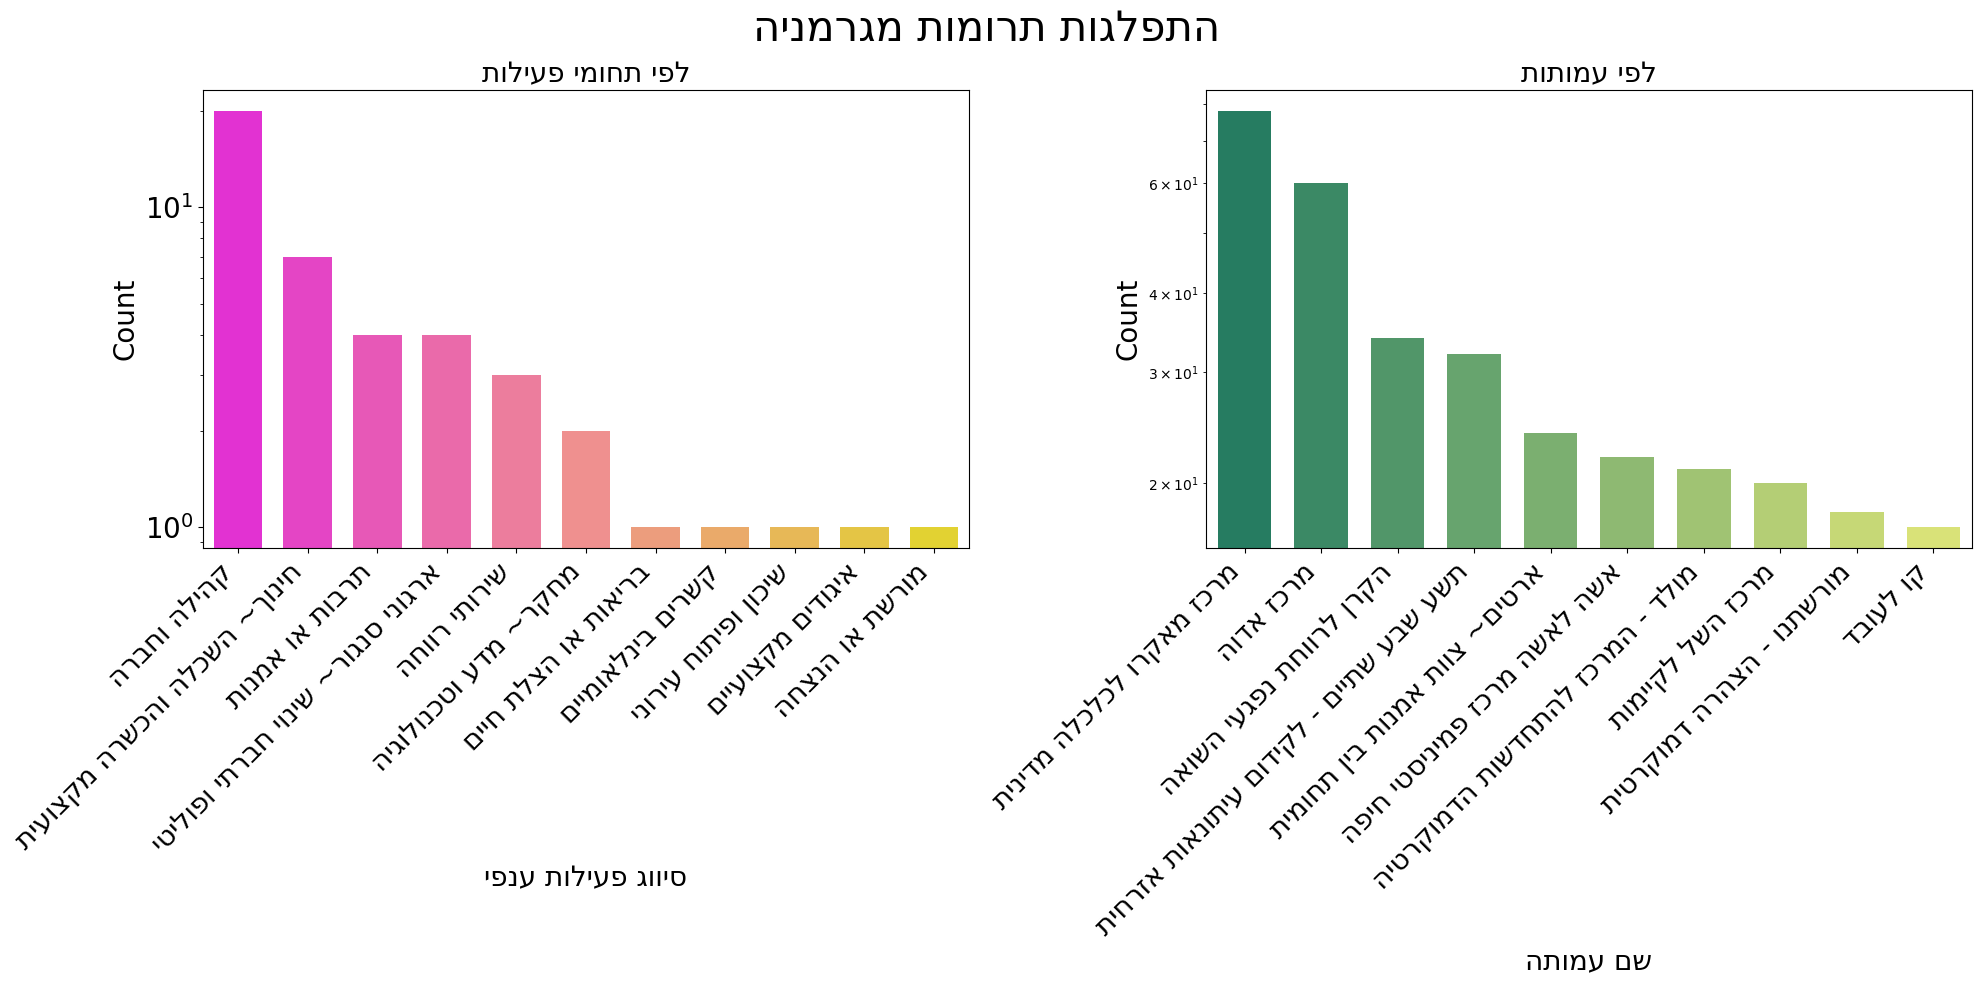

In [29]:
#גרפים המציגים את התפלגות התרומות מגרמניה לפי עמותות ולפי תחום הפעילות

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('הינמרגמ תומורת תוגלפתה', fontsize=30)


#גרף סיווג ענפי פעילות של עמותות שגרמניה תורמת אליהם
sns.barplot(data=ACTIVE_ASSO_GERMANY, x=ACTIVE_ASSO_GERMANY['סיווג פעילות ענפי'].value_counts().index, y=ACTIVE_ASSO_GERMANY['סיווג פעילות ענפי'].value_counts(), palette='spring', ax=ax1, width=0.7, errorbar=None)
labels = ['הרבחו הליהק', 'תיעוצקמ הרשכהו הלכשה ~ךוניח', 'תונמא וא תוברת', 'יטילופו יתרבח יוניש ~רוגנס ינוגרא', 'החוור יתוריש', 'היגולונכטו עדמ ~רקחמ', 'םייח תלצה וא תואירב', 'םיימואלניב םירשק', 'ינוריע חותיפו ןוכיש', 'םייעוצקמ םידוגיא', 'החצנה וא תשרומ']
ax1.set_xticklabels(labels, rotation=45 , ha = 'right' , fontsize=20)
ax1.set_title('תוליעפ ימוחת יפל', size = 20)
ax1.set_xlabel(('יפנע תוליעפ גוויס'), size=20)
ax1.set_ylabel(('Count'), size=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_yscale("log")

#גרף פריסת העמותות שגרמניה תורמת אליהן במיוחד
sns.barplot(data=DNT_GERMANY_DF, x=DNT_GERMANY_DF['שם עמותה'].value_counts().head(10).index, y=DNT_GERMANY_DF['שם עמותה'].value_counts().head(10).values, palette='summer', ax=ax2, width=0.7, errorbar=None)
labels = ['תינידמ הלכלכל ורקאמ זכרמ', 'הודא זכרמ', 'האושה יעגפנ תחוורל ןרקה', 'תיחרזא תואנותיע םודיקל - םייתש עבש עשת', 'תימוחת ןיב תונמא תווצ ~םיטרא', 'הפיח יטסינימפ זכרמ השאל השא', 'היטרקומדה תושדחתהל זכרמה - דלומ', 'תומייקל לשה זכרמ', 'תיטרקומד הרהצה - ונתשרומ', 'דבועל וק']
ax2.set_xticklabels(labels, rotation=45 , ha = 'right' , fontsize=20)
ax2.set_title('תותומע יפל' , size = 20)
plt.xlabel('התומע םש',size = 20)
ax2.set_ylabel(('Count'), size=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yscale("log")

plt.tight_layout()
plt.show()

ניתוח מקור התרומות לקרן נפגעי השואה

In [30]:
sources_germany_values

['קרן רוזה לוקסמבורג',
 'קרן היינריך בל',
 'קרן פרידריך אברט',
 'שגרירות גרמניה',
 'ממשלת גרמניה',
 'קרן פרידריך אברט בישראל']

In [31]:
#כמות כל התרומות שמגיעות לקרן לרווחת נפגעי השואה
DNT_HOLOCAUST = DNT_DF.loc[DNT_DF['שם עמותה']=='הקרן לרווחת נפגעי השואה (ע~ר)']
len(DNT_HOLOCAUST)

63

In [32]:
#כמות התרומות לעמותת נפגעי השואה שמגיעות מגרמניה
len(DNT_HOLOCAUST[DNT_HOLOCAUST['ישות מדינית זרה תורמת'].isin(sources_germany_values)])

34

In [33]:
#כמות התרומות לעמותת נפגעי השואה שמגיעות לא מגרמניה
len(DNT_HOLOCAUST[~DNT_HOLOCAUST['ישות מדינית זרה תורמת'].isin(sources_germany_values)])

29

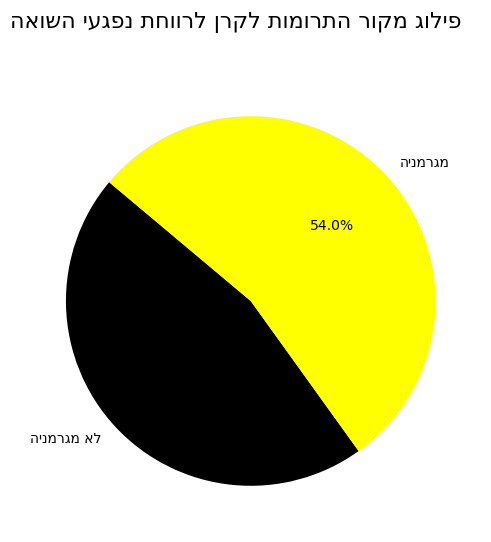

In [34]:
#בניית גרף עוגה על מקור התרומות לנפגעי השואה
fig, axes = plt.subplots(figsize=(12, 6))
# plt.subplots_adjust(wspace=0.7)
fig.suptitle('האושה יעגפנ תחוורל ןרקל תומורתה רוקמ גוליפ', fontsize=16)
categories_num = [29,34]
categories = ['הינמרגמ אל', 'הינמרגמ']
colors = ['black', 'yellow']
axes.pie(categories_num, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.show()

תת מסקנה- יותר מחצי מהתרומות שמגיעות ל'קרן לרווחת נפגעי השואה' מגיעות מגרמניה.

מגיעות מגרמניה. המקור המרכזי לכספי התרומות הוא ארה"ב (כפי שציפינו) אך גם מאירופה מגיעות תרומות בסדר גודל שווה. מגרמניה מגיעות תרומות גבוהות במיוחד יחסית לשאר אירופה, עיקר התרומות לעמותות ניצולי שואה.

### פרק 2- יעדי התרומות לעמותות בארץ

נראה את עשרת העמותות הכי נתרמות ואת עשרת העמותות שהכי פחות תורמים להם

In [35]:
DNT_ASSO_MONEY_DF = DNT_DF.groupby('שם עמותה')['סכום התרומה בש~ח'].sum().reset_index()
sorted_DNT_ASSO_MONEY_DF_mony = DNT_ASSO_MONEY_DF.sort_values(by='סכום התרומה בש~ח', ascending=False)
sorted_DNT_ASSO_MONEY_DF_mony.head(10)

,שם עמותה,סכום התרומה בש~ח
170,הקרן לרווחת נפגעי השואה (ע~ר),3878138149
437,רובין פוד (ע~ר),2465423846
115,הועד הציבורי נגד עינויים בישראל THE PUBLIC COM...,109791359
349,עיר עמים (ע~ר),82966744
278,מכון ליאו בק ירושלים לתולדות יהודי גרמניה ותרב...,76904091
232,ישראייד - הפורום הישראלי לסיוע הומניטרי בינלאו...,68283292
90,בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים ...,66369949
230,יש דין - ארגון מתנדבים לזכויות האדם (ע~ר),66005309
39,איתך- מעכי- משפטניות למען צדק חברתי (ע~ר),62062793
305,מרכז פרס לשלום ולחדשנות (ע~ר),60713459


In [36]:
sorted_DNT_ASSO_MONEY_DF_mony.tail(10)

,שם עמותה,סכום התרומה בש~ח
52,אנו - עושים שינוי בע~מ (חל~צ),14000
163,הקהילה הצ'יליאנית של ישראל (ע~ר),10750
312,משכן התורה והחסד - ביתר עילית (ע~ר),9960
234,יתרת (ע~ר),9067
350,עמותה טסט צרוף קבלה 1 (ע~ר),555
198,חל~צ טסט אתר בע~מ (חל~צ),33
399,קהילת אשל אברהם (ע~ר),0
411,קרן אמל - תקווה (ע~ר),0
81,בית כנסת תפארת אריאל (ע~ר),0
288,מרום - העמותה העירונית לקידום חוסן קהילתי בירו...,0


נתמקד בעמותות שעיקר מימונן מחו"ל

In [37]:
#עבודה רק עם עמודת "עיקר מימון תרומות מישות מדינית זרה"
FILTER_DF_MAIN_FUND = DNT_DF.loc[DNT_DF['עיקר מימון תרומות מישות מדינית זרה']=='כן']
FILTER_DF_MAIN_FUND.head()

,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,מטרת תרומה,התנאים לתרומה,שנת תרומה,עיקר מימון תרומות מישות מדינית זרה,Column1
420,ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר),07/09/2020,ACCD,רשות מקומית או מחוזית~ רשות שלטונית של מדינה ז...,1924,אירו,פרויקט מעקב התנחלויות,חשיפה תקשורתית ופעילות משפטית והנגשת מידע לציבור,2020,כן,NaN
421,ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר),07/09/2020,IFA,איחוד~ ארגון או חבר של מדינות זרות,57401,אירו,פרויקט ירושלים מעקב התנחלויות,חשיפה תקשורתית ופעילות משפטית והנגשת מידע לציבור,2020,כן,NaN
422,ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר),07/09/2020,MISERIOR,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,71989,אירו,פרויקט מעקב התנחלויות,חשיפה תקשורתית ופעילות משפטית והנגשת מידע לציבור,2020,כן,NaN
423,ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר),07/09/2020,Foreign Commonwealth Office,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,38111,שקל חדש,פרויקט מעקב התנחלויות,חשיפה תקשורתית ופעילות משפטית והנגשת מידע לציבור,2020,כן,NaN
424,ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר),07/09/2020,שגרירות נורבגיה,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,219807,שקל חדש,פרויקט מעקב התנחלויות,חשיפה תקשורתית ופעילות משפטית והנגשת מידע לציבור,2020,כן,NaN


In [38]:
#רשימת העמותות שגם עיקר המימון שלהן מחו"ל, וגם קיבלו יותר מ50 תרומות מחו"ל לאורך השנים
value_counts_names = FILTER_DF_MAIN_FUND['שם עמותה'].value_counts()
values_to_keep = value_counts_names[value_counts_names > 50].index
FILTER_MAIN_FUND_OVER_50_DF = FILTER_DF_MAIN_FUND[FILTER_DF_MAIN_FUND['שם עמותה'].isin(values_to_keep)]
FILTER_MAIN_FUND_OVER_50_DF.head()

,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,מטרת תרומה,התנאים לתרומה,שנת תרומה,עיקר מימון תרומות מישות מדינית זרה,Column1
1225,מרכז היעוץ הערבי לחינוך (ע~ר),26/12/2018,ארגון הבריאות העולמי WHO,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,55832,אירו,פרויקט הכשרת פסיכולוגים בבתי חולים .,קיום תנאי החוזה,2018,כן,NaN
1226,מרכז היעוץ הערבי לחינוך (ע~ר),26/12/2018,ארגון CCFD הצרפתי,תאגיד שהוקם בחיקוק של אחד מהגופים הנ~ל~ או שגו...,85352,אירו,מטרות העמותה הכלליות.,אין.,2018,כן,NaN
1227,מרכז היעוץ הערבי לחינוך (ע~ר),26/12/2018,ארגון SAVE THE CHILDREN,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,27724,דולר ארה~ב,פרוייקט חינוך נוער בסיכון .,קיום תנאי ההסכם,2018,כן,NaN
1228,מרכז היעוץ הערבי לחינוך (ע~ר),26/12/2018,ארגון UNICEF,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,240420,שקל חדש,פרויקט הכשרה למדריכי נוער,קיום תנאי החוזה,2018,כן,NaN
1229,מרכז היעוץ הערבי לחינוך (ע~ר),26/12/2018,ארגון FINN CHURCH AID הפיני,אורגן~ רשות או נציגות של מדינה זרה או של איחוד...,126437,אירו,פרויקט ההתאמה BIG BROTHER BIG SISTER,קיום תנאי ההסכם,2018,כן,NaN


In [39]:
#רשימת העמותות שגם עיקר המימון שלהן מחו"ל, וגם קיבלו יותר מ50 תרומות מחו"ל לאוך השנים
FILTER_MAIN_FUND_OVER_50_DF['שם עמותה'].value_counts()

שם עמותה
גישה- מרכז לשמירה על הזכות לנוע (ע~ר)                                         216
המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)                             187
בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)                           172
קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)                        138
יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)                                     129
עמותה לנוער וצעירים ערביים - בלדנא (ע~ר)                                      124
מרכז היעוץ הערבי לחינוך (ע~ר)                                                 103
הקרן למגיני זכויות אדם בע~מ (חל~צ)                                             89
עיר עמים (ע~ר)                                                                 69
במקום - תכנון וזכויות אדם (ע~ר)                                                63
חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)                                 61
ח.ל. חינוך לשלום בע~מ (חל~צ)                                                   60
הקרן לש

In [40]:
#בדיקה שאכן הובאו לנו העמותות בעלות תרומה יותר מ50 פעמים
FILTER_MAIN_FUND_OVER_50_DF['שם עמותה'].value_counts().index

Index(['גישה- מרכז לשמירה על הזכות לנוע (ע~ר)',
       'המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)',
       'בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)',
       'קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)',
       'יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)',
       'עמותה לנוער וצעירים ערביים - בלדנא (ע~ר)',
       'מרכז היעוץ הערבי לחינוך (ע~ר)', 'הקרן למגיני זכויות אדם בע~מ (חל~צ)',
       'עיר עמים (ע~ר)', 'במקום - תכנון וזכויות אדם (ע~ר)',
       'חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)',
       'ח.ל. חינוך לשלום בע~מ (חל~צ)',
       'הקרן לשיתוף פעולה כלכלי  (ע~ר)  THE ECONOMIC COOPERATION FOUNDATION (R.A.)',
       'שוברים שתיקה בע~מ (חל~צ)', 'כרם נבות בע~מ (חל~צ)'],
      dtype='object', name='שם עמותה')

In [41]:
#סכמנו את סכומי התרומות בשקלים שמקבלת כל עמותה מתוך ה50 המובילות שעיקר מימונן מחו"ל
SUM_MONEY_FUND_50 = FILTER_MAIN_FUND_OVER_50_DF.groupby('שם עמותה')['סכום התרומה בש~ח'].sum()
SUM_MONEY_FUND_50.index

Index(['במקום - תכנון וזכויות אדם (ע~ר)',
       'בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)',
       'גישה- מרכז לשמירה על הזכות לנוע (ע~ר)',
       'המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)',
       'הקרן למגיני זכויות אדם בע~מ (חל~צ)',
       'הקרן לשיתוף פעולה כלכלי  (ע~ר)  THE ECONOMIC COOPERATION FOUNDATION (R.A.)',
       'ח.ל. חינוך לשלום בע~מ (חל~צ)',
       'חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)',
       'יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)', 'כרם נבות בע~מ (חל~צ)',
       'מרכז היעוץ הערבי לחינוך (ע~ר)', 'עיר עמים (ע~ר)',
       'עמותה לנוער וצעירים ערביים - בלדנא (ע~ר)',
       'קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)',
       'שוברים שתיקה בע~מ (חל~צ)'],
      dtype='object', name='שם עמותה')

In [42]:
#סכומי התרומות של כל העמותות שעיקר מימונן מחו"ל
SUM_MONEY_FUND_TOP10 = FILTER_DF_MAIN_FUND.groupby('שם עמותה')['סכום התרומה בש~ח'].sum().sort_values()[::-1]
SUM_MONEY_FUND_TOP10[:10]

שם עמותה
הקרן לרווחת נפגעי השואה (ע~ר)                                                           573632031
עיר עמים (ע~ר)                                                                           66702868
ישראייד - הפורום הישראלי לסיוע הומניטרי בינלאומי (ע~ר)                                   54464590
הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)     45039804
בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)                                      36474571
גישה- מרכז לשמירה על הזכות לנוע (ע~ר)                                                    36035663
יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)                                                34457153
קומט- מי בע~מ (חל~צ)                                                                     32693895
המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)                                        31555225
קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)                                   24402968
Name: סכום 

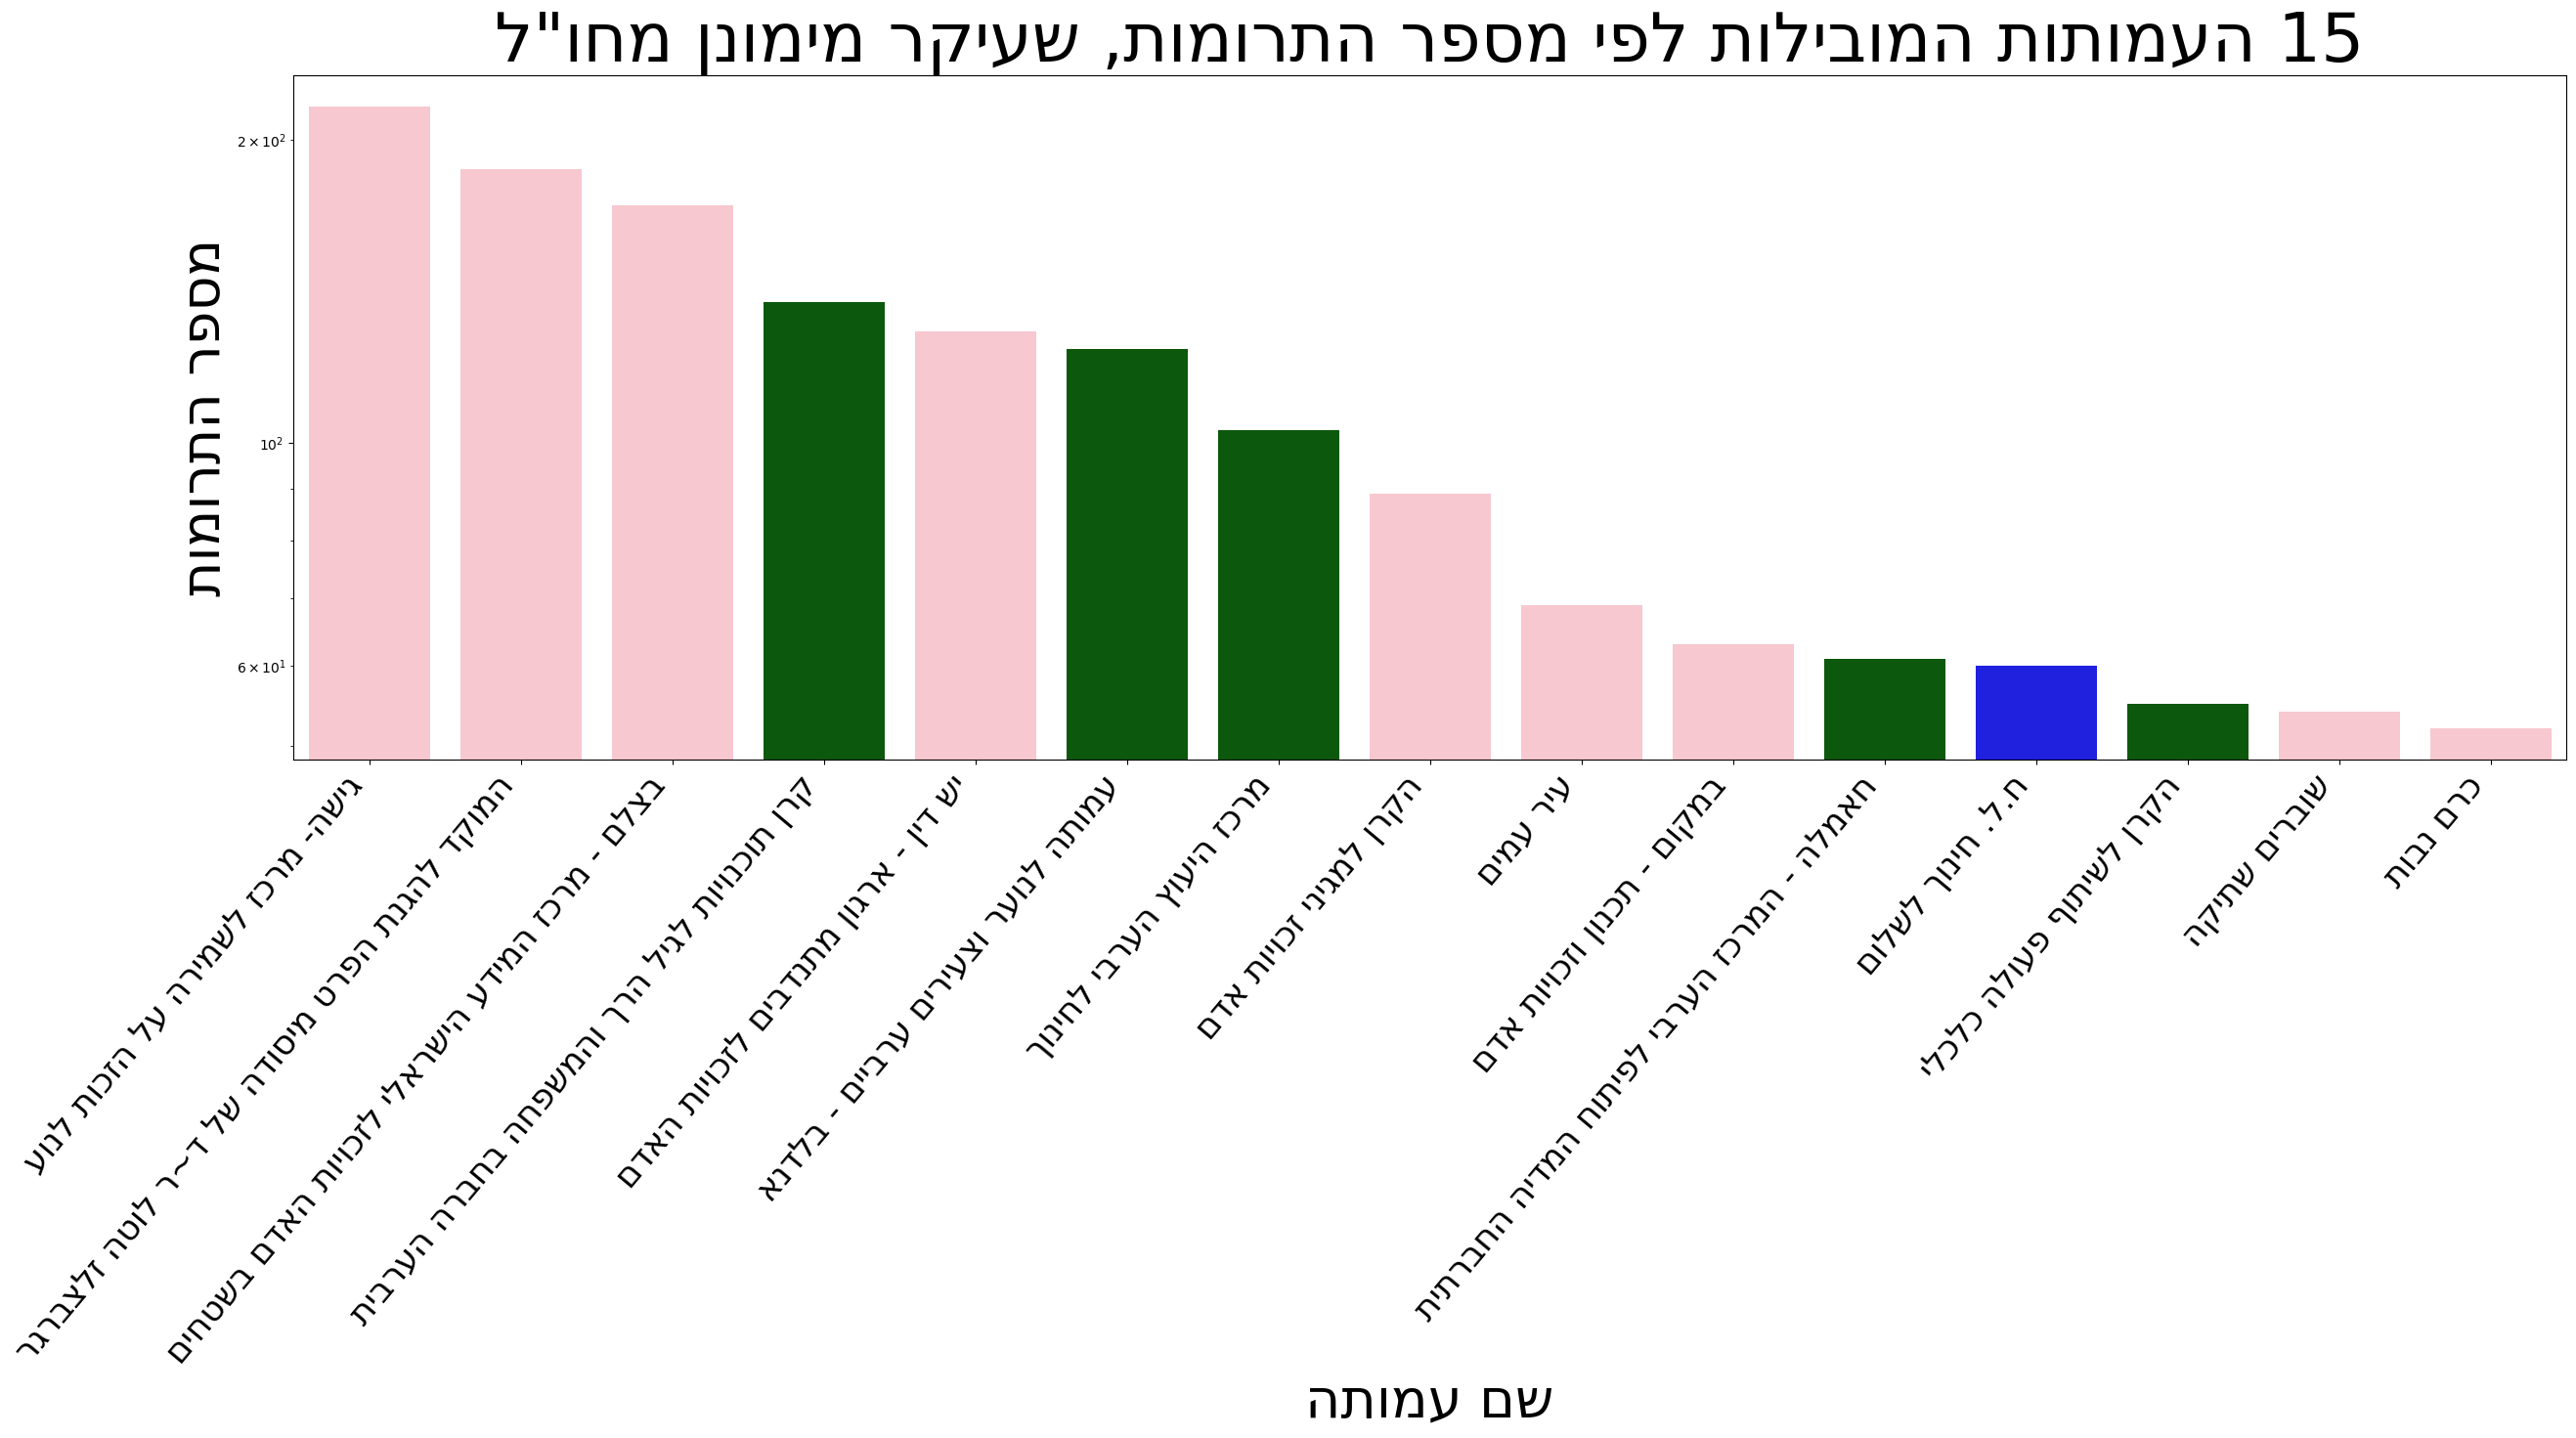

In [43]:
# גרף המייצג את כמות התרומות שהגיעו לעמותות הכי נתרמות (לפי כמות תרומות), שעיקר מימונן הוא מחו"ל
plt.figure(figsize=(30, 20))
plt.subplot(211)
#מהצד השמאלי של המפה הפוליטית
red_lab = ['גישה- מרכז לשמירה על הזכות לנוע (ע~ר)','המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)','בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)','יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)','הקרן למגיני זכויות אדם בע~מ (חל~צ)','עיר עמים (ע~ר)', 'במקום - תכנון וזכויות אדם (ע~ר)','שוברים שתיקה בע~מ (חל~צ)', 'כרם נבות בע~מ (חל~צ)']
#עוסקות בחברה הערבית
green_lab = ['הקרן לשיתוף פעולה כלכלי  (ע~ר)  THE ECONOMIC COOPERATION FOUNDATION (R.A.)','חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)','מרכז היעוץ הערבי לחינוך (ע~ר)','קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)','עמותה לנוער וצעירים ערביים - בלדנא (ע~ר)']
#עמותות ניטרליות
blue_lab =  ['ח.ל. חינוך לשלום בע~מ (חל~צ)']

colors_dict = {name: 'pink' if name in red_lab else 'darkgreen' if name in green_lab else 'blue' for name in FILTER_MAIN_FUND_OVER_50_DF['שם עמותה'].unique()}
order = FILTER_MAIN_FUND_OVER_50_DF['שם עמותה'].value_counts().index
ax = sns.countplot(x='שם עמותה', data=FILTER_MAIN_FUND_OVER_50_DF ,order=order, palette=[colors_dict[name] for name in order])
labels = ['עונל תוכזה לע הרימשל זכרמ -השיג', 'רגרבצלז הטול ר~ד לש הדוסימ טרפה תנגהל דקומה', 'םיחטשב םדאה תויוכזל ילארשיה עדימה זכרמ - םלצב', 'תיברעה הרבחב החפשמהו ךרה ליגל תויונכות ןרק', 'םדאה תויוכזל םיבדנתמ ןוגרא - ןיד שי', 'אנדלב - םייברע םיריעצו רעונל התומע', 'ךוניחל יברעה ץועיה זכרמ', 'םדא תויוכז יניגמל ןרקה', 'םימע ריע', 'םדא תויוכזו ןונכת - םוקמב', 'תיתרבחה הידמה חותיפל יברעה זכרמה - הלמאח', 'םולשל ךוניח .ל.ח', 'ילכלכ הלועפ ףותישל ןרקה', 'הקיתש םירבוש', 'תובנ םרכ']
ax.set_xticklabels(labels, rotation=50, ha='right', size=25)
ax.set_yscale("log")
plt.title('ל"וחמ ןנומימ רקיעש ,תומורתה רפסמ יפל תוליבומה תותומעה 15',size = 50)
plt.xlabel('התומע םש',size = 40)
plt.ylabel('תומורתה רפסמ',size = 40)
plt.show()

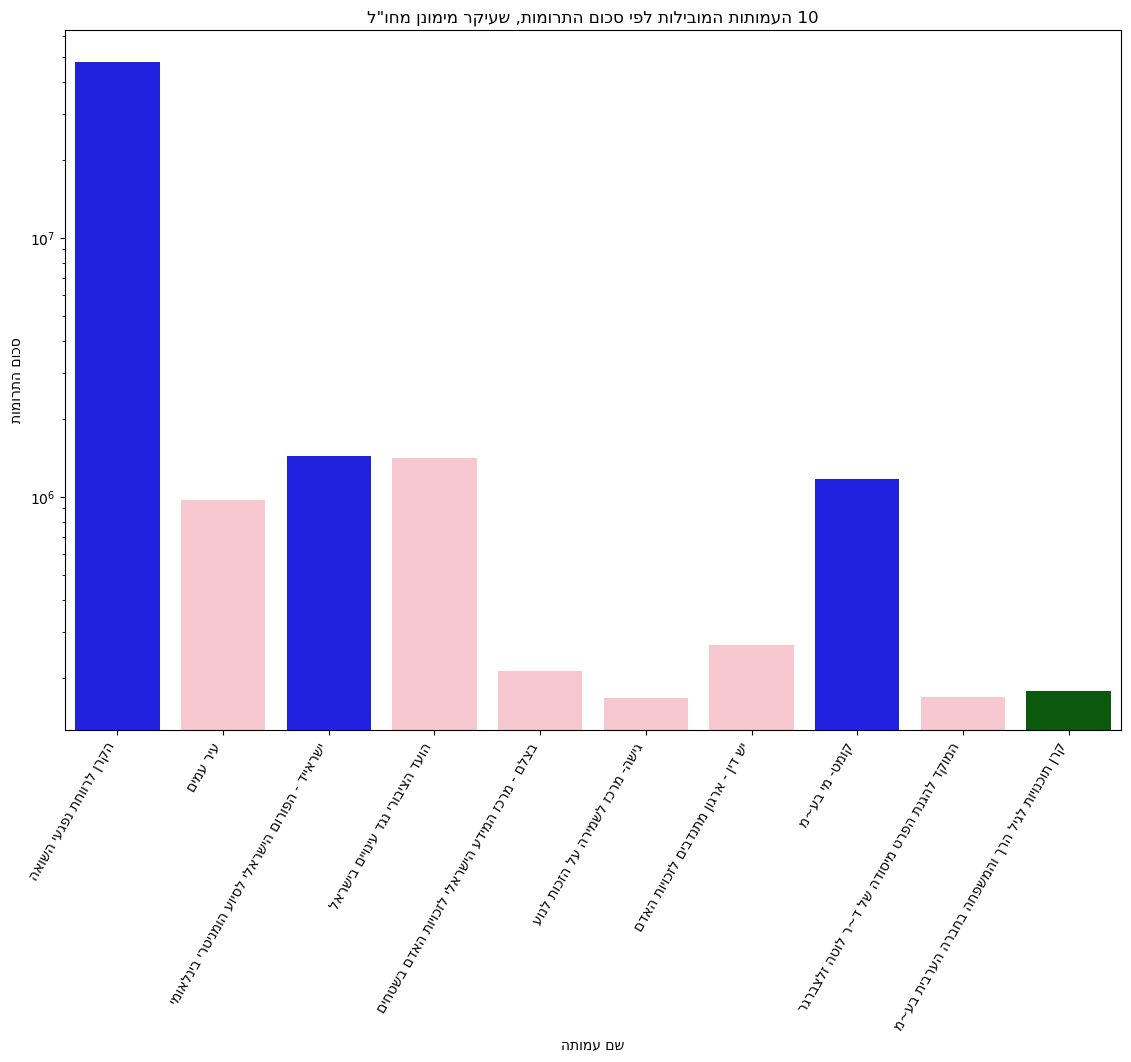

In [44]:
#גרף המייצג את סכום התרומות שהגיעו לעמותות הכי נתרמות(לפי סכום התרומות), שעיקר מימונן הוא מחו"ל
plt.figure(figsize=(30, 20))
plt.subplot(222)
#מהצד השמאלי של המפה הפוליטית
red_lab = ['עיר עמים (ע~ר)',
       'הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)',
       'בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)',
       'גישה- מרכז לשמירה על הזכות לנוע (ע~ר)',
       'יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)',
       'המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)']
#עוסקות בחברה הערבית
green_lab = ['קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)']
             
#עמותות ניטרליות
blue_lab =  ['הקרן לרווחת נפגעי השואה (ע~ר)', 'ישראייד - הפורום הישראלי לסיוע הומניטרי בינלאומי (ע~ר)', 'קומט- מי בע~מ (חל~צ)']
ordered_data = FILTER_DF_MAIN_FUND.groupby('שם עמותה')['סכום התרומה בש~ח'].sum().sort_values()[::-1][:10].index
colors_dict = {name: 'pink' if name in red_lab else 'darkgreen' if name in green_lab else 'blue' for name in ordered_data}
ax = sns.barplot(x='שם עמותה', y='סכום התרומה בש~ח', data=FILTER_DF_MAIN_FUND, order=ordered_data, palette=[colors_dict[name] for name in ordered_data], errorbar=None)
labels = ['האושה יעגפנ תחוורל ןרקה', 'םימע ריע', 'ימואלניב ירטינמוה עויסל ילארשיה םורופה - דייארשי', 'לארשיב םייוניע דגנ ירוביצה דעוה', 'םיחטשב םדאה תויוכזל ילארשיה עדימה זכרמ - םלצב', 'עונל תוכזה לע הרימשל זכרמ -השיג', 'םדאה תויוכזל םיבדנתמ ןוגרא - ןיד שי', 'מ~עב ימ -טמוק', 'רגרבצלז הטול ר~ד לש הדוסימ טרפה תנגהל דקומה', 'מ~עב תיברעה הרבחב החפשמהו ךרה ליגל תויונכות ןרק']
ax.set_xticklabels(labels)
plt.title('ל"וחמ ןנומימ רקיעש ,תומורתה םוכס יפל תוליבומה תותומעה 10')
plt.xlabel('התומע םש')
plt.ylabel('תומורתה םוכס')
plt.xticks(rotation=60, ha='right')
ax.set_yscale("log")
plt.show()

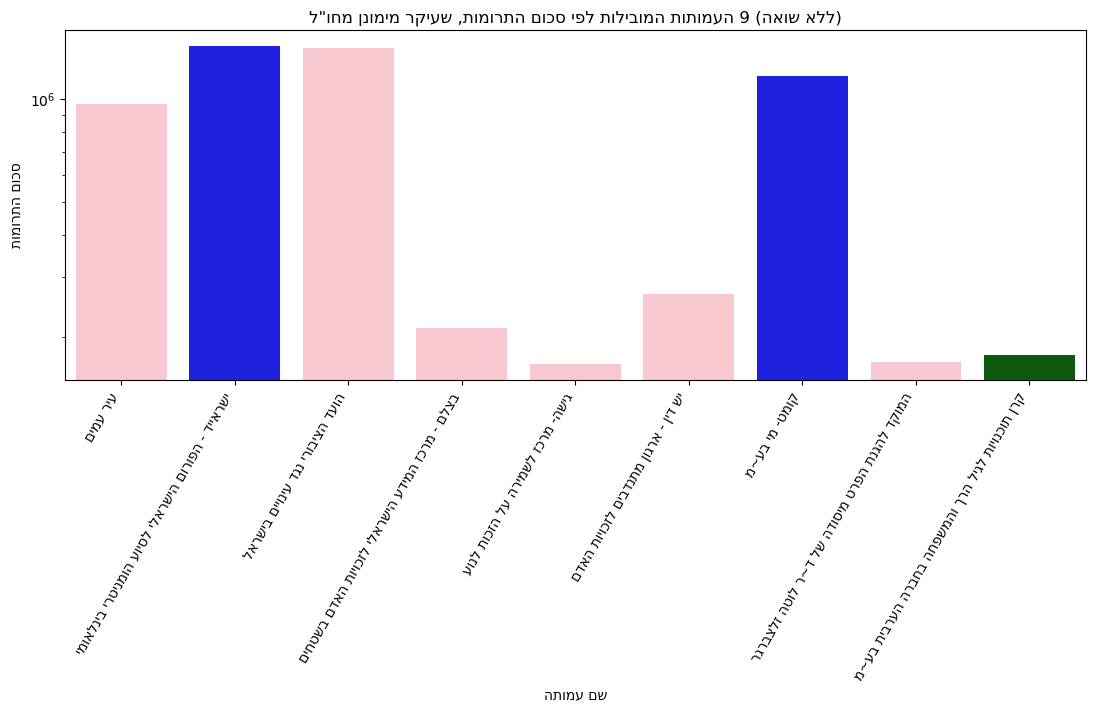

In [45]:
#גרף המייצג את סכום התרומות שהגיעו לעמותות הכי נתרמות(לפי סכום התרומות), שעיקר מימונן הוא מחו"ל
plt.figure(figsize=(29, 10))
plt.subplot(222)
red_lab = ['עיר עמים (ע~ר)',
       'הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)',
       'בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)',
       'גישה- מרכז לשמירה על הזכות לנוע (ע~ר)',
       'יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)',
       'המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)']
#עוסקות בחברה הערבית
green_lab = ['קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)']
             
#עמותות ניטרליות
blue_lab =  ['ישראייד - הפורום הישראלי לסיוע הומניטרי בינלאומי (ע~ר)', 'קומט- מי בע~מ (חל~צ)']
ordered_data = FILTER_DF_MAIN_FUND.groupby('שם עמותה')['סכום התרומה בש~ח'].sum().sort_values()[::-1][1:10].index
colors_dict = {name: 'pink' if name in red_lab else 'darkgreen' if name in green_lab else 'blue' for name in ordered_data}
ax = sns.barplot(x='שם עמותה', y='סכום התרומה בש~ח', data=FILTER_DF_MAIN_FUND, order=ordered_data,palette=[colors_dict[name] for name in ordered_data], errorbar=None)
labels = ['םימע ריע', 'ימואלניב ירטינמוה עויסל ילארשיה םורופה - דייארשי', 'לארשיב םייוניע דגנ ירוביצה דעוה', 'םיחטשב םדאה תויוכזל ילארשיה עדימה זכרמ - םלצב', 'עונל תוכזה לע הרימשל זכרמ -השיג', 'םדאה תויוכזל םיבדנתמ ןוגרא - ןיד שי', 'מ~עב ימ -טמוק', 'רגרבצלז הטול ר~ד לש הדוסימ טרפה תנגהל דקומה', 'מ~עב תיברעה הרבחב החפשמהו ךרה ליגל תויונכות ןרק']
ax.set_xticklabels(labels)
plt.title('ל"וחמ ןנומימ רקיעש ,תומורתה םוכס יפל תוליבומה תותומעה 9 (האוש אלל)')
plt.xlabel('התומע םש')
plt.ylabel('תומורתה םוכס')
plt.xticks(rotation=60, ha='right')
ax.set_yscale("log")
plt.show()

קישורים לעמותות שמוצגות בגרף לעיל:

בצלם- https://www.btselem.org/hebrew

כרם נבות- https://www.keremnavot.org/

גישה- המרכז לשמירה על הזכות לנוע- https://gisha.org/

המוקד להגנת הפרט- https://hamoked.org.il/about_new.php?p=management

חינוך לשלום - https://www.guidestar.org.il/organization/513468538

_________________
בניית דיאגרמת עוגות על עמותות שעיקר מימונן מחו"ל

In [46]:
values_options = ['גישה- מרכז לשמירה על הזכות לנוע (ע~ר)',
       'המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)',
       'בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)',
       'קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)',
       'יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)',
       'עמותה לנוער וצעירים ערביים - בלדנא (ע~ר)',
       'מרכז היעוץ הערבי לחינוך (ע~ר)', 'הקרן למגיני זכויות אדם בע~מ (חל~צ)',
       'עיר עמים (ע~ר)', 'במקום - תכנון וזכויות אדם (ע~ר)',
       'חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)',
       'ח.ל. חינוך לשלום בע~מ (חל~צ)',
       'הקרן לשיתוף פעולה כלכלי  (ע~ר)  THE ECONOMIC COOPERATION FOUNDATION (R.A.)',
       'שוברים שתיקה בע~מ (חל~צ)', 'כרם נבות בע~מ (חל~צ)']

FUND_ASSO_FILTER_DF = ASSO_DF[ASSO_DF['שם עמותה בעברית'].isin(values_options)]
FUND_ASSO_FILTER_DF.head()

,תאריך רישום עמותה,שם עמותה בעברית,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,מחזור כספי (הכנסות),סך הוצאות העמותה,כמות מתנדבים,כמות עובדים,איזורי פעילות,שנת דיווח אחרונה,כתובת - ישוב,מטרות עמותה
9689,09/11/1987,מרכז היעוץ הערבי לחינוך (ע~ר),רשומה,חינוך~ השכלה והכשרה מקצועית,אחר - חינוך~ השכלה והכשרה מקצועית,1862086.0,0,60.0,19.0,NaN,2022.0,ירושלים,יעוץ חינוכי~ נפשי ואחר לתלמידי בתי ספר\r\nולסט...
11881,03/02/1989,בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים ...,רשומה,ארגוני סנגור~ שינוי חברתי ופוליטי,אחר - ארגוני סנגור~ שינוי חברתי ופוליטי,11027293.0,0,137.0,30.0,NaN,2022.0,ירושלים,איסוף מידע על המתרחש בתחום זכויות האדם בשטחים\...
13192,08/01/1990,המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר),רשומה,שירותי רווחה,אחר - שירותי רווחה,5953000.0,1683000,3.0,24.0,ירושלים~יהודה ושומרון,2022.0,ירושלים,סיוע לקרבנות מעשי אלימות~ עזרה לנזקקים\r\nלהעב...
14958,31/01/1991,הקרן לשיתוף פעולה כלכלי (ע~ר) THE ECONOMIC C...,רשומה,ארגוני סנגור~ שינוי חברתי ופוליטי,פעילות פוליטית,3511183.0,0,0.0,5.0,NaN,2022.0,צרעה,פיתוח רעיונות ויזום תוכניות לפרוייקטים\r\nכלכל...
27550,11/05/1999,במקום - תכנון וזכויות אדם (ע~ר),רשומה,קהילה וחברה,אחר - קהילה וחברה,4502815.0,0,2.0,19.0,NaN,2022.0,ירושלים,לסייע לקהילות המצויות בנחיתות מקצועית~ כלכלית~...


In [47]:
FUND_ASSO_FILTER_DF[['סיווג פעילות ענפי','כתובת - ישוב']]

,סיווג פעילות ענפי,כתובת - ישוב
9689,חינוך~ השכלה והכשרה מקצועית,ירושלים
11881,ארגוני סנגור~ שינוי חברתי ופוליטי,ירושלים
13192,שירותי רווחה,ירושלים
14958,ארגוני סנגור~ שינוי חברתי ופוליטי,צרעה
27550,קהילה וחברה,ירושלים
28663,קהילה וחברה,חיפה
29242,ארגוני סנגור~ שינוי חברתי ופוליטי,ירושלים
36224,ארגוני סנגור~ שינוי חברתי ופוליטי,תל אביב - יפו
36624,קהילה וחברה,תל אביב - יפו
48646,קהילה וחברה,חיפה


In [48]:
FUND_ASSO_FILTER_ACTIVE_DF = FUND_ASSO_FILTER_DF['סיווג פעילות ענפי'].value_counts()
FUND_ASSO_FILTER_ACTIVE_DF

סיווג פעילות ענפי
קהילה וחברה                          7
ארגוני סנגור~ שינוי חברתי ופוליטי    4
חינוך~ השכלה והכשרה מקצועית          3
שירותי רווחה                         1
Name: count, dtype: int64

In [49]:
FUND_ASSO_FILTER_CITY_DF = FUND_ASSO_FILTER_DF['כתובת - ישוב'].value_counts()
FUND_ASSO_FILTER_CITY_DF

כתובת - ישוב
ירושלים          6
תל אביב - יפו    5
חיפה             2
צרעה             1
רמת גן           1
Name: count, dtype: int64

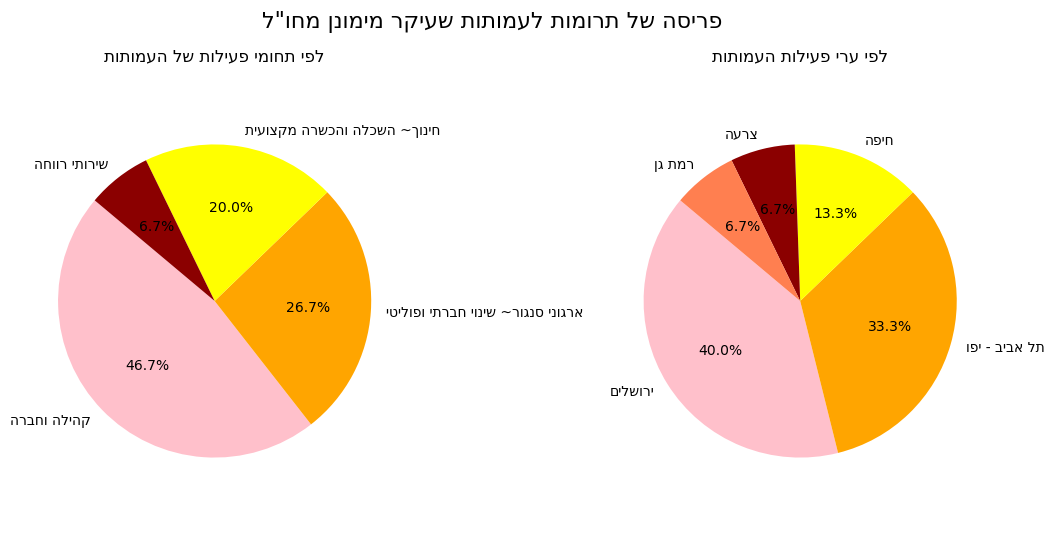

In [50]:
#דיאגרמות עוגות המציגות את תחומי הפעילות וערי הפעילות של העמותות שעיקר מימונן מחו"ל
fig, axes = plt.subplots(1, 2, figsize=(12, 6) ,)
plt.subplots_adjust(wspace=0.7)
fig.suptitle('ל"וחמ ןנומימ רקיעש תותומעל תומורת לש הסירפ', fontsize=16)

categories_num = [7,4,3,1]
categories = ['הרבחו הליהק','יטילופו יתרבח יוניש ~רוגנס ינוגרא','תיעוצקמ הרשכהו הלכשה ~ךוניח','החוור יתוריש']
colors = ['pink', 'orange', 'yellow', 'darkred']
axes[0].pie(categories_num, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')
axes[0].set_title('תותומעה לש תוליעפ ימוחת יפל')

city_num = [6,5,2,1,1]
cities = ['םילשורי', 'ופי - ביבא לת', 'הפיח', 'הערצ', 'ןג תמר']
colors = ['pink', 'orange', 'yellow', 'darkred','coral']
axes[1].pie(city_num, labels=cities, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].axis('equal')
axes[1].set_title('תותומעה תוליעפ ירע יפל')
plt.show()

לקחנו את כל העמותות שעיקר המימון שלהן הוא מישות זרה, ושמקבלות באופן יחסי הרבה תרומות מחו"ל (מעל 50 תרומות לאורך השנים), ובעזרת CHAT GPT מצאנו שניתן לסווג את העמותות **כעמותות מהצד השמאלי של המפה הפוליטית בישראל או עמותות התומכות בחברה הערבית. רובן מתמקדות במאבקים נגד ההתיישבות בעד זכויות מיעוטים, הגנה על זכויות האדם בכלליו, ותומכות בקבוצות חברתיות המושפעות מהם.**

### מעכשיו נחקור את כל העמותות

בניית דיאגרמת עוגות על כלל העמותות

In [51]:
FUND_ASSO_ACTIVE_DF = ASSO_DF['סיווג פעילות ענפי'].value_counts().tolist()
FUND_ASSO_ACTIVE_DF

[16140,
 15880,
 14252,
 5269,
 4301,
 3903,
 2947,
 1735,
 1565,
 1459,
 1086,
 867,
 528,
 498,
 180]

In [52]:
ASSO_DF['סיווג פעילות ענפי'].value_counts().index.tolist()

['דת',
 'חינוך~ השכלה והכשרה מקצועית',
 'שירותי רווחה',
 'קהילה וחברה',
 'ספורט',
 'תרבות או אמנות',
 'בריאות או הצלת חיים',
 'שיכון ופיתוח עירוני',
 'מורשת או הנצחה',
 'מחקר~ מדע וטכנולוגיה',
 'ארגוני סנגור~ שינוי חברתי ופוליטי',
 'סביבה ובעלי חיים',
 'איגודים מקצועיים',
 'קשרים בינלאומיים',
 'התנדבות וקרנות פילנטרופיות']

In [53]:
FUND_ASSO_CITY_DF = ASSO_DF['כתובת - ישוב'].value_counts()
FUND_ASSO_CITY_DF
top_30_cities = FUND_ASSO_CITY_DF.head(30).index.tolist()
top_30_cities

['ירושלים',
 'תל אביב - יפו',
 'בני ברק',
 'חיפה',
 'בית שמש',
 'אשדוד',
 'פתח תקווה',
 'רמת גן',
 'נתניה',
 'באר שבע',
 'ראשון לציון',
 'רחובות',
 'אשקלון',
 'חולון',
 'ביתר עילית',
 'מודיעין עילית',
 'הרצליה',
 'רעננה',
 'צפת',
 'כפר סבא',
 'בת ים',
 'אלעד',
 'חדרה',
 'לוד',
 'נצרת',
 'מודיעין-מכבים-רעות',
 'קריית גת',
 'רמת השרון',
 'טבריה',
 'נתיבות']

In [54]:
occurrences_city = FUND_ASSO_CITY_DF.head(30).values.tolist()
occurrences_city

[15493,
 6720,
 3823,
 2079,
 1925,
 1589,
 1553,
 1511,
 1422,
 1190,
 1091,
 980,
 763,
 745,
 734,
 724,
 693,
 625,
 582,
 558,
 556,
 556,
 539,
 527,
 475,
 420,
 389,
 385,
 374,
 369]

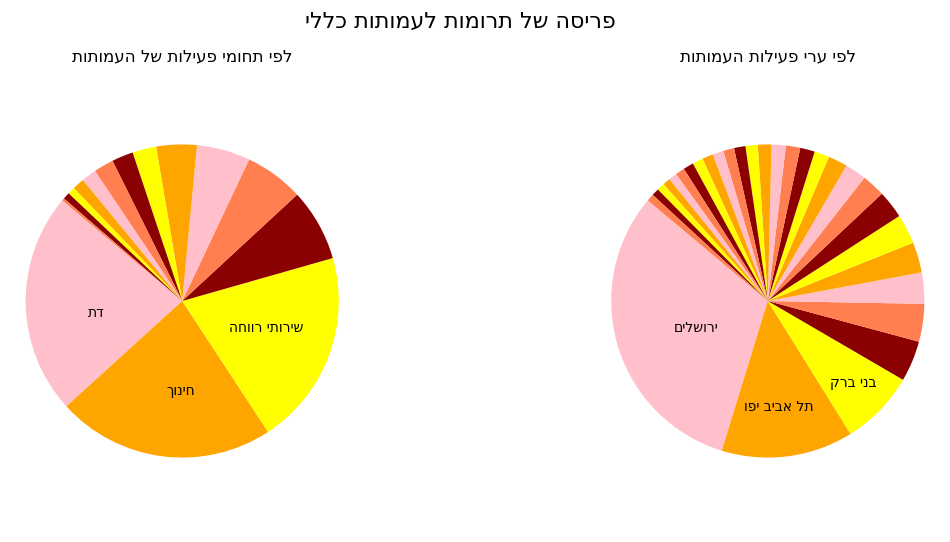

In [55]:
#דיאגרמת עוגות של תחומי פעיללות וערי פעילות של כלל העמותות
fig, axes = plt.subplots(1, 2, figsize=(12, 6) ,)
plt.subplots_adjust(wspace=0.7)
fig.suptitle('יללכ תותומעל תומורת לש הסירפ', fontsize=16)

activity_num = [16140,15880,14252,5269,4301,3903,2947,1735,1565,1459,1086,867,528,498,180]
activities = ['דת','חינוך~ השכלה והכשרה מקצועית','שירותי רווחה','קהילה וחברה','ספורט','תרבות או אמנות','בריאות או הצלת חיים','שיכון ופיתוח עירוני','מורשת או הנצחה','מחקר~ מדע וטכנולוגיה','ארגוני סנגור~ שינוי חברתי ופוליטי','סביבה ובעלי חיים','איגודים מקצועיים','קשרים בינלאומיים','התנדבות וקרנות פילנטרופיות']
cities_num = [15493,6720,3823,2079,1925,1589,1553,1511,1422,1190,1091,980,763,745,734,724,693,625,582,558,556,556,539,527,475,420,389,385,374,369]
cities = ['ירושלים','תל אביב - יפו','בני ברק','חיפה','בית שמש','אשדוד','פתח תקווה','רמת גן','נתניה','באר שבע','ראשון לציון','רחובות','אשקלון','חולון','ביתר עילית','מודיעין עילית','הרצליה','רעננה','צפת','כפר סבא','בת ים','אלעד','חדרה','לוד','נצרת','מודיעין-מכבים-רעות','קריית גת','רמת השרון','טבריה','נתיבות']
colors = ['pink', 'orange', 'yellow', 'darkred','coral']


axes[0].pie(activity_num, colors=colors, startangle=140)
axes[0].axis('equal')
axes[0].text(-0.6, -0.1,'תד')
axes[0].text(-0.1, -0.6,'ךוניח')
axes[0].text(0.3, -0.2,'החוור יתוריש')
axes[0].set_title('תותומעה לש תוליעפ ימוחת יפל')

axes[1].pie(cities_num, colors= colors , startangle=140)
axes[1].axis('equal')
axes[1].text(0.4, -0.55,'קרב ינב')
axes[1].text(-0.15, -0.7,'ופי ביבא לת')
axes[1].text(-0.6, -0.2,'םילשורי')
axes[1].set_title('תותומעה תוליעפ ירע יפל')

plt.show()

ניתן לראות שהערים שבהן פועלות הכי הרבה עמותות הן ירושלים, תל אביב ובני ברק. זוהי מסקנה מפתיעה- היינו מצפים שערים גדולות באוכלסיה שלהן יהיו ביחס דומה למספר העמותות הפועלות בהן, כמו בירושלים ותל אביב. אך הופתענו לגלות שמספר שלישי ברשימה היא העיר בני ברק, העיר ה8 בגדולה בארץ, ולא בחמשת הערים הגדולות ביותר.

In [56]:
# ארגונים שקיבלו תרומה גבוהה מאוד במהלך כל השנים 
ASSO_LARGE_DF = DNT_DF.groupby('שם עמותה').filter(lambda x: x['סכום התרומה בש~ח'].sum() > 500000) \
                            .groupby('שם עמותה')[['סכום התרומה בש~ח']].sum() \
                            .reset_index() \
                            .sort_values(by='סכום התרומה בש~ח', ascending = False ) 
ASSO_LARGE_DF

,שם עמותה,סכום התרומה בש~ח
81,הקרן לרווחת נפגעי השואה (ע~ר),3878138149
228,רובין פוד (ע~ר),2465423846
55,הועד הציבורי נגד עינויים בישראל THE PUBLIC COM...,109791359
174,עיר עמים (ע~ר),82966744
139,מכון ליאו בק ירושלים לתולדות יהודי גרמניה ותרב...,76904091
...,...,...
216,קרן להנצחת זכר חללי גיטו טרזין (טרזיינשטט) (ע~ר),517062
161,נוצר בירושלים (ע~ר),512474
237,שותפות לעתיד ישראל (ע~ר),512021
126,מוזיאון ישראל (חל~צ),510526


אנו רואים כי יש התאמה בין העמותות שעיקר מימונן מחו"ל ומקבלות הכי הרבה תרומות לבין כלל העמותות המקבלות את הסכומים הגבוהים ביותר

###  .סיכום מסקנה 2- תרומות מחו"ל לעמותות בארץ מושפעות ומשפיעות משיקולים פוליטיים, ופועלות בתחום נפגעי השואה. בנוסף מצאנו שהערים הפעילות ביותר בנושא עמותות הן ירושלים, תל אביב ובני ברק

### מסקנה 3- זמני ותאריכי התרומות

נציג את הזמנים בשנים חודשים וימים בהם בעיקר מגיעות התרומות

In [57]:
#תאריך קבלת תרומה ראשון ואחרון בדקנו את טווח התאריכים של התרומות מישויות זרות בכדי להראות שהנתונים רלוונטים ועדכניים
last = DNT_DF['תאריך קבלת התרומה'].max()
first = DNT_DF['תאריך קבלת התרומה'].min()

print(last, first)

#שנת תרומת ראשונה ואחרונה
lastY = DNT_DF['שנת תרומה'].max()
firstY = DNT_DF['שנת תרומה'].min()

print(lastY, firstY)

31/12/2023 01/01/2017
2024 2012


In [58]:
# שינוי טיפוס של "שנת תרומה" לתאריך ושל תאריך קבלת התרומה לטיפוס תאריך עם יצירת עמודה חדשה בשם date_giving    
DNT_DF['שנת תרומה'] = pd.to_datetime(DNT_DF['שנת תרומה'], format='%Y')
DNT_DF.dtypes
DNT_DF['date_giving'] = pd.to_datetime(DNT_DF['תאריך קבלת התרומה'], format='%d/%m/%Y')
DNT_DF.dtypes

שם עמותה                                      object
תאריך קבלת התרומה                             object
ישות מדינית זרה תורמת                         object
סוג ישות מדינית זרה תורמת (קוד)               object
סכום התרומה בש~ח                               int64
מטבע                                          object
מטרת תרומה                                    object
התנאים לתרומה                                 object
שנת תרומה                             datetime64[ns]
עיקר מימון תרומות מישות מדינית זרה            object
Column1                                      float64
date_giving                           datetime64[ns]
dtype: object

In [59]:
# בדיקה שאכן השינוי מתבצע כפי שרצינו
DNT_DF[['date_giving','תאריך קבלת התרומה']].head()

,date_giving,תאריך קבלת התרומה
0,2021-06-29,29/06/2021
1,2021-06-29,29/06/2021
2,2019-07-01,01/07/2019
3,2019-07-01,01/07/2019
4,2019-07-01,01/07/2019


In [60]:
# בשביל שנוכל לראות את התרומות ע"פ שנים, חודישם וימים ניצור עמודות חדשות לכל אחד
DNT_DF['day'] = pd.DatetimeIndex(DNT_DF['date_giving']).day
DNT_DF['month'] = pd.DatetimeIndex(DNT_DF['date_giving']).month 
DNT_DF['year'] = pd.DatetimeIndex(DNT_DF['date_giving']).year 

In [61]:
# בדיקה שאכן קורה
DNT_DF.loc[3:1000:50,['date_giving','year','month','day','שם עמותה', 'סכום התרומה בש~ח']].head()

,date_giving,year,month,day,שם עמותה,סכום התרומה בש~ח
3,2019-07-01,2019,7,1,סינמטק תל - אביב (ע~ר),1577
53,2018-08-19,2018,8,19,קרן להנצחת זכר חללי גיטו טרזין (טרזיינשטט) (ע~ר),55332
103,2017-10-29,2017,10,29,פסטיבל ישראל~ ירושלים (ע~ר),23194
153,2015-12-17,2015,12,17,תיאטרון הקרון על שם מריו קוטליאר (ע~ר),21150
203,2022-01-06,2022,1,6,האגודה לזכויות האזרח בישראל (ע~ר),21124


In [62]:
# בדיקה כמה סה"כ ניתן בכל חודש בשביל להשוות החודשים
month_given = DNT_DF.groupby('month')[['סכום התרומה בש~ח']].sum().reset_index()
month_given

,month,סכום התרומה בש~ח
0,1,3678739532
1,2,576050558
2,3,299134711
3,4,117594716
4,5,819363376
5,6,180761670
6,7,318278163
7,8,681385913
8,9,72861473
9,10,461484349


In [63]:
# בדיקה כמה סה"כ ניתן בכל שנה בשביל להשוות השנים
DNT_DF.groupby('year')[['סכום התרומה בש~ח']].sum().reset_index()

,year,סכום התרומה בש~ח
0,2012,30686363
1,2013,63093575
2,2014,77374669
3,2015,130768813
4,2016,168110244
5,2017,949670981
6,2018,843410496
7,2019,451200690
8,2020,548264444
9,2021,1015574235


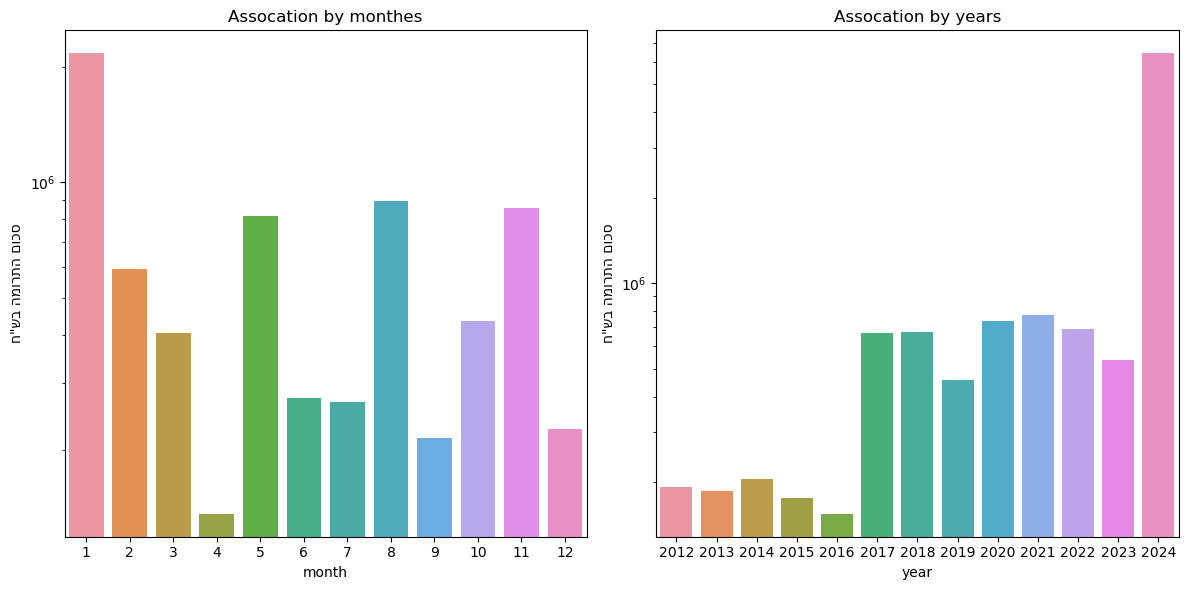

In [64]:
#  ע"פ הטבלאות שיצרנו ניצור שני גרפים המראים את התפלגות התרומות לחודשים ושנים וכך נוכל לראות בגרף מה החודשים והשנים המרכזיים לתרומה
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=DNT_DF, y='סכום התרומה בש~ח', x='month', ax=ax1, errorbar=None)
ax1.set_ylabel('ח"שב המורתה םוכס')
ax1.set_title('Assocation by monthes')
ax1.set_yscale("log")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=DNT_DF, y='סכום התרומה בש~ח', x='year', ax=ax2, errorbar=None)
ax2.set_ylabel('ח"שב המורתה םוכס')
ax2.set_title('Assocation by years')
ax2.set_yscale("log")

plt.tight_layout()
plt.show()

מסקנה- רואים בבירור שחודש ינואר הוא החודש השכיח ביותר לקבלת תרומה, אחריו חודשים מאי, אוגוסט ונובמבר.

מסקנה נוספת, משנת 2017 היקף התרומות מחו"ל גדל

 --------------------------------------------------------
 כעת נחקור את שנת 2024- בה התרומות גדלו באופן משמעותי מאוד. נבין לאילו עמותות הגיעו התרומות, ולאילו תחומי פעילות.

In [65]:
# נבודד את 2024 בפני עצמה כדי שנוכל לחקור אותה ונוציא טבלה המראה לאיפה בעיקר נתרם   
year_2024_df = DNT_DF[DNT_DF['year'] == 2024]

ASSO_LARGE_2024_DF = year_2024_df.groupby('שם עמותה').filter(lambda x: x['סכום התרומה בש~ח'].sum() > 500000) \
                            .groupby('שם עמותה')[['סכום התרומה בש~ח']].sum() \
                            .reset_index() \
                            .sort_values(by='סכום התרומה בש~ח', ascending = False ) 
ASSO_LARGE_2024_DF.head()

,שם עמותה,סכום התרומה בש~ח
39,רובין פוד (ע~ר),2465423846
14,הקרן לרווחת נפגעי השואה (ע~ר),88784462
8,הועד הציבורי נגד עינויים בישראל THE PUBLIC COM...,47896994
34,קרן אשקלון (ע~ר),19071447
20,כל - טיב אייד בע~מ (חל~צ),15947228


In [66]:
year_2024_df.groupby('month')[['סכום התרומה בש~ח']].sum().reset_index()

,month,סכום התרומה בש~ח
0,1,2492285554
1,2,168722606
2,3,21870334
3,4,21046927
4,5,9547308


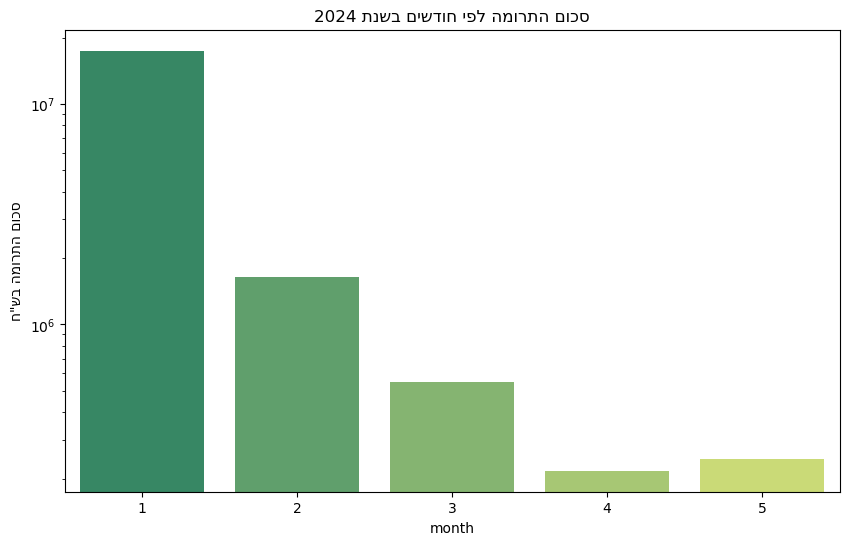

In [67]:
# הגרף המראה את התפלגות התרומות ב2024 ע"פ חודשים
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=year_2024_df, y='סכום התרומה בש~ח', x='month', ax=ax1, palette='summer', errorbar=None)
ax1.set_title('2024 תנשב םישדוח יפל המורתה םוכס')
ax1.set_ylabel('ח"שב המורתה םוכס')
ax1.set_yscale("log")
plt.show()

לאחר שראינו ששנת 2024 היא המוצלחת ביותר, נראה לאילו ענפי פעילות ותחומים תרמו בעיקר, זה נעשה ע"י השוואה לעמותות

In [68]:
#כל העמותות שקיבלו יותר מ500000 שקל תרומות ב2024
value_counts_names_24 = ASSO_LARGE_2024_DF['שם עמותה'].value_counts()
filtered_names_24 = value_counts_names_24.index
filtered_names_24

Index(['רובין פוד (ע~ר)', 'יוזמות עתיד (ע''ר)', 'עמק שווה בע~מ (חל~צ)',
       'המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)',
       'תפוח - עמותה לקידום עידן המידע בישראל (ע~ר)',
       'סראיא המרכז לשרותי חברה ירושלים בע~מ (חל~צ)',
       'הפורום הערבי למיניות הפרט והמשפחה (ע~ר)', 'נאמנות הלו בע~מ (חל~צ)',
       'מרכז אדוה (ע~ר)',
       'עמותת כ~ן - כוח נשים לקידום מנהיגות נשים בישראל (ע~ר)',
       'מפגש - חינוך וטכנולוגיה למען המזרח התיכון (ע~ר)',
       'המוקד לפליטים ולמהגרים (ע~ר)', 'אלמעמל - לאומנות מודרנית (ע~ר)',
       'סיכוי אופוק - לשוויון ושותפות- سيكوي أفق - للمساواة والشراكة (ע~ר)',
       'מרכז פרס לשלום ולחדשנות (ע~ר)',
       'קטמון מועדון אוהדים - איחוד אוהדי הפועל ירושלים (ע~ר)',
       'מוזאיקה- דת~ חברה ומדינה (ע~ר)',
       'חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)', 'יבוס (ע~ר)',
       'עמותת מוסדות חינוך מאר אליאס - אעבלין (ע~ר)',
       'אלקאוס לשונות מינית ומגדרית בחברה הפלסטינית (ע~ר)',
       'ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר)'

In [69]:
#הכנת דאטה של אותן עמותות בלבד מהדאטה עמותות
values = ['רובין פוד (ע~ר)', 'יוזמות עתיד (ע''ר)', 'עמק שווה בע~מ (חל~צ)','המוקד להגנת הפרט מיסודה של ד~ר לוטה זלצברגר (ע~ר)','תפוח - עמותה לקידום עידן המידע בישראל (ע~ר)','סראיא המרכז לשרותי חברה ירושלים בע~מ (חל~צ)','הפורום הערבי למיניות הפרט והמשפחה (ע~ר)', 'נאמנות הלו בע~מ (חל~צ)','מרכז אדוה (ע~ר)','עמותת כ~ן - כוח נשים לקידום מנהיגות נשים בישראל (ע~ר)','מפגש - חינוך וטכנולוגיה למען המזרח התיכון (ע~ר)','המוקד לפליטים ולמהגרים (ע~ר)', 'אלמעמל - לאומנות מודרנית (ע~ר)','סיכוי אופוק - לשוויון ושותפות- سيكوي أفق - للمساواة والشراكة (ע~ר)','מרכז פרס לשלום ולחדשנות (ע~ר)','קטמון מועדון אוהדים - איחוד אוהדי הפועל ירושלים (ע~ר)','מוזאיקה- דת~ חברה ומדינה (ע~ר)','חאמלה - המרכז הערבי לפיתוח המדיה החברתית (ע~ר)', 'יבוס (ע~ר)','עמותת מוסדות חינוך מאר אליאס - אעבלין (ע~ר)','אלקאוס לשונות מינית ומגדרית בחברה הפלסטינית (ע~ר)','ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר)','הקרן לרווחת נפגעי השואה (ע~ר)','יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)','הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)','קרן אשקלון (ע~ר)', 'כל - טיב אייד בע~מ (חל~צ)','קרן קונרד אדנאואר (חל~צ)', 'קרן באר-שבע לפיתוח (ע~ר)',
       'האגודה לתרבות ערבית (ע~ר)', 'קומט- מי בע~מ (חל~צ)',
       'קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)',
       'קול מריה מנצרת (ע~ר)',
       'א.ס.ף. - ארגון סיוע לפליטים ומבקשי מקלט בישראל (ע~ר)',
       'הקרן למגיני זכויות אדם בע~מ (חל~צ)', 'במקום - תכנון וזכויות אדם (ע~ר)',
       'בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים (ע~ר)',
       'שוברים שתיקה בע~מ (חל~צ)', 'איתך- מעכי- משפטניות למען צדק חברתי (ע~ר)',
       'האגודה לזכויות האזרח בישראל (ע~ר)', 'קרן הנס זיידל (חל~צ)',
       'הפרויקט הלאומי לקהילה האתיופית בישראל בע~מ (חל~צ)', 'טקטופיס (ע~ר)']
ASSO_FILTER_DF_24 = ASSO_DF[ASSO_DF['שם עמותה בעברית'].isin(values)]
ASSO_FILTER_DF_24.head()

,תאריך רישום עמותה,שם עמותה בעברית,סטטוס עמותה,סיווג פעילות ענפי,תחום פעילות משני,מחזור כספי (הכנסות),סך הוצאות העמותה,כמות מתנדבים,כמות עובדים,איזורי פעילות,שנת דיווח אחרונה,כתובת - ישוב,מטרות עמותה
1029,26/01/1983,האגודה לזכויות האזרח בישראל (ע~ר),רשומה,ארגוני סנגור~ שינוי חברתי ופוליטי,אחר - ארגוני סנגור~ שינוי חברתי ופוליטי,9572665.0,0,10.0,49.0,NaN,2022.0,תל אביב - יפו,לפעול למען הגנה על זכויות האדם והאזרח בישראל~ ...
3151,30/06/1982,ש.ע.ל - שלום עכשיו לישראל מפעלים חינוכיים (ע~ר),רשומה,חינוך~ השכלה והכשרה מקצועית,אחר - חינוך~ השכלה והכשרה מקצועית,2355812.0,466804,40.0,11.0,ירושלים~יהודה ושומרון~תל אביב,2022.0,תל אביב - יפו,לעסוק בפעילות חינוכית וציבורית לקידום השלום ע~...
8411,20/01/1986,קרן באר-שבע לפיתוח (ע~ר),רשומה,שירותי רווחה,אחר - שירותי רווחה,38484208.0,0,0.0,3.0,NaN,2022.0,באר שבע,פיתוח תשתיות בניית מבני ציבור ואחזקתם.\r\nפיתו...
11881,03/02/1989,בצלם - מרכז המידע הישראלי לזכויות האדם בשטחים ...,רשומה,ארגוני סנגור~ שינוי חברתי ופוליטי,אחר - ארגוני סנגור~ שינוי חברתי ופוליטי,11027293.0,0,137.0,30.0,NaN,2022.0,ירושלים,איסוף מידע על המתרחש בתחום זכויות האדם בשטחים\...
12726,15/04/1991,מרכז אדוה (ע~ר),רשומה,קהילה וחברה,אחר - קהילה וחברה,2132839.0,0,0.0,16.0,NaN,2022.0,תל אביב - יפו,לפעול לקידום השוויון החברתי בין המינים~ העדות\...


In [70]:
ASSO_FILTER_DF_24['סיווג פעילות ענפי'].value_counts()

סיווג פעילות ענפי
קהילה וחברה                          15
שירותי רווחה                          6
חינוך~ השכלה והכשרה מקצועית           5
ארגוני סנגור~ שינוי חברתי ופוליטי     4
תרבות או אמנות                        3
מחקר~ מדע וטכנולוגיה                  2
קשרים בינלאומיים                      2
בריאות או הצלת חיים                   1
ספורט                                 1
דת                                    1
Name: count, dtype: int64

In [71]:
ASSO_LARGE_2024_DF.head(10)

,שם עמותה,סכום התרומה בש~ח
39,רובין פוד (ע~ר),2465423846
14,הקרן לרווחת נפגעי השואה (ע~ר),88784462
8,הועד הציבורי נגד עינויים בישראל THE PUBLIC COM...,47896994
34,קרן אשקלון (ע~ר),19071447
20,כל - טיב אייד בע~מ (חל~צ),15947228
37,קרן קונרד אדנאואר (חל~צ),8585977
35,קרן באר-שבע לפיתוח (ע~ר),7168260
7,האגודה לתרבות ערבית (ע~ר),6675815
32,קומט- מי בע~מ (חל~צ),3767251
38,קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~...,3739629


In [72]:
asso = ASSO_LARGE_2024_DF['שם עמותה'].tolist()
money_sum = ASSO_LARGE_2024_DF['סכום התרומה בש~ח'].tolist()

asso[:10], money_sum[:10]

(['רובין פוד (ע~ר)',
  'הקרן לרווחת נפגעי השואה (ע~ר)',
  'הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)',
  'קרן אשקלון (ע~ר)',
  'כל - טיב אייד בע~מ (חל~צ)',
  'קרן קונרד אדנאואר (חל~צ)',
  'קרן באר-שבע לפיתוח (ע~ר)',
  'האגודה לתרבות ערבית (ע~ר)',
  'קומט- מי בע~מ (חל~צ)',
  'קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)'],
 [2465423846,
  88784462,
  47896994,
  19071447,
  15947228,
  8585977,
  7168260,
  6675815,
  3767251,
  3739629])

Text(0.5, 1.0, '(המורתה םוכס יפל) תומרתנ יכה תותומעה תרשע')

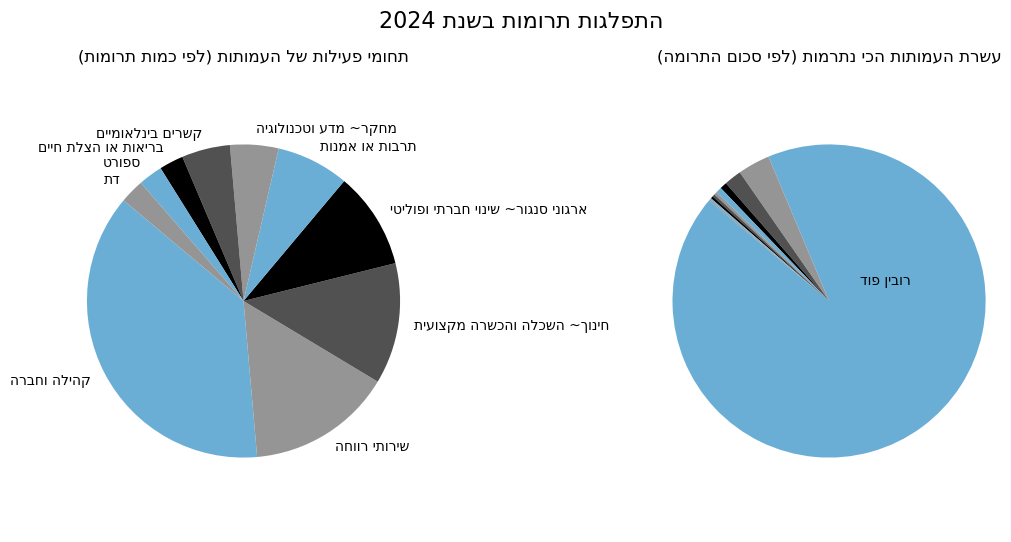

In [73]:
#גרף המציג את העמותות ותחומי הפעילות של עמותות שקיבלו תרומות ב2024
fig, axes = plt.subplots(1, 2, figsize=(12, 6) ,)
plt.subplots_adjust(wspace=0.7)
fig.suptitle('2024 תנשב תומורת תוגלפתה', fontsize=16)

blue_colors = plt.cm.Blues(np.linspace(0.5, 1, sum([1 for x in categories_num if x > 4])))
gray_colors = plt.cm.Greys(np.linspace(0.5, 1, sum([1 for x in categories_num if x <= 4])))
colors = []
blue_idx = 0
gray_idx = 0
for value in categories_num:
    if value > 4:
        colors.append(blue_colors[blue_idx])
        blue_idx += 1
    else:
        colors.append(gray_colors[gray_idx])
        gray_idx += 1

activities_num = [15,6,5,4,3,2,2,1,1,1]
activities = ['הרבחו הליהק', 'החוור יתוריש', 'תיעוצקמ הרשכהו הלכשה ~ךוניח', 'יטילופו יתרבח יוניש ~רוגנס ינוגרא', 'תונמא וא תוברת', 'היגולונכטו עדמ ~רקחמ', 'םיימואלניב םירשק', 'םייח תלצה וא תואירב', 'טרופס', 'תד']
axes[0].pie(activities_num, labels=activities, colors=colors, startangle=140)
axes[0].axis('equal')
axes[0].set_title('(תומורת תומכ יפל) תותומעה לש תוליעפ ימוחת')

money_summ = [2465423846, 88784462,47896994,19071447,15947228,8585977,7168260,6675815,3767251,3739629]
axes[1].pie(money_summ, colors=colors, startangle=140)
axes[1].text(0.2, 0.1,'דופ ןיבור')
axes[1].axis('equal')
axes[1].set_title('(המורתה םוכס יפל) תומרתנ יכה תותומעה תרשע')

In [74]:
DNT_DF.loc[DNT_DF['שם עמותה']=='רובין פוד (ע~ר)']

,שם עמותה,תאריך קבלת התרומה,ישות מדינית זרה תורמת,סוג ישות מדינית זרה תורמת (קוד),סכום התרומה בש~ח,מטבע,מטרת תרומה,התנאים לתרומה,שנת תרומה,עיקר מימון תרומות מישות מדינית זרה,Column1,date_giving,day,month,year
9148,רובין פוד (ע~ר),30/01/2024,האיחוד האירופי,איחוד~ ארגון או חבר של מדינות זרות,239862,אירו,השתתפות בפרויקט ZEROW,NaN,2022-01-01,לא,NaN,2024-01-30,30,1,2024
9149,רובין פוד (ע~ר),30/01/2024,האיחוד האירופי European Comission,איחוד~ ארגון או חבר של גופים זרים,2465183984,אירו,השתתפות בפרויקט ZEROW,פעילויות בנושא הטמעת מסרים ושיתופי פעולה,2022-01-01,לא,NaN,2024-01-30,30,1,2024


מצאנו שלעמותה זו יש 2 תרומות בלבד וזה כנראה לא משקף תמונה אמיתית, אז נחתוך אותה ונבחן שוב, בלעדיה.

In [75]:
asso[1:11], money_sum[1:11]

(['הקרן לרווחת נפגעי השואה (ע~ר)',
  'הועד הציבורי נגד עינויים בישראל THE PUBLIC COMMITTEE AGAINST TORTURE IN ISRAEL (ע~ר)',
  'קרן אשקלון (ע~ר)',
  'כל - טיב אייד בע~מ (חל~צ)',
  'קרן קונרד אדנאואר (חל~צ)',
  'קרן באר-שבע לפיתוח (ע~ר)',
  'האגודה לתרבות ערבית (ע~ר)',
  'קומט- מי בע~מ (חל~צ)',
  'קרן תוכנויות לגיל הרך והמשפחה בחברה הערבית בע~מ (חל~צ)',
  'יש דין - ארגון מתנדבים לזכויות האדם (ע~ר)'],
 [88784462,
  47896994,
  19071447,
  15947228,
  8585977,
  7168260,
  6675815,
  3767251,
  3739629,
  3343668])

Text(0.5, 1.0, '(המורתה םוכס יפל) תומרתנ יכה תותומעה תרשע')

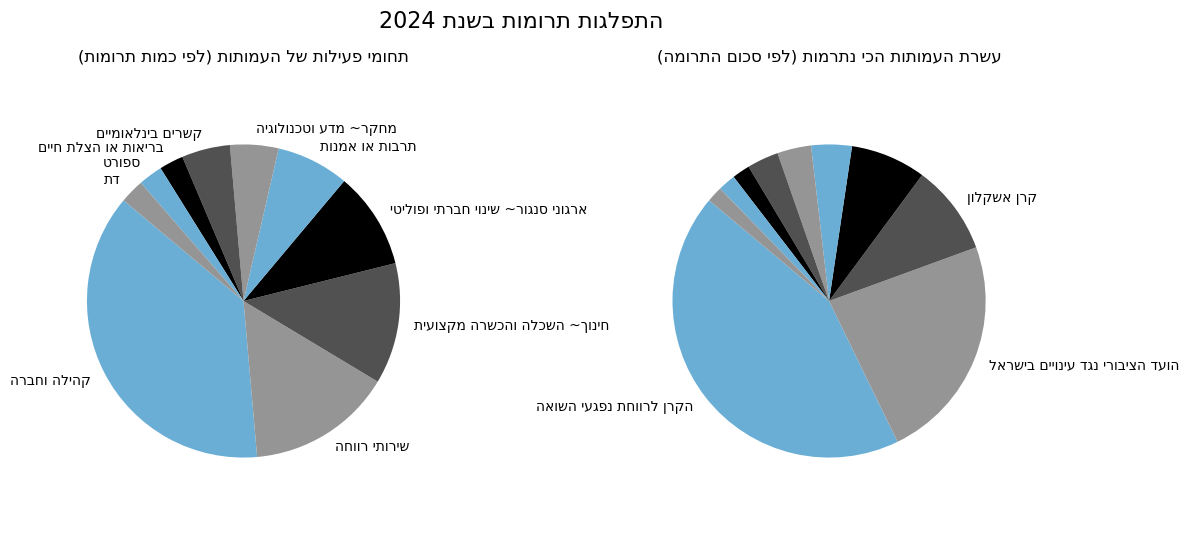

In [76]:
#גרף המציג את העמותות ותחומי הפעילות של עמותות שקיבלו תרומות ב2024 (ללא רובין פוד)
fig, axes = plt.subplots(1, 2, figsize=(12, 6) ,)
plt.subplots_adjust(wspace=0.7)
fig.suptitle('2024 תנשב תומורת תוגלפתה', fontsize=16)

blue_colors = plt.cm.Blues(np.linspace(0.5, 1, sum([1 for x in categories_num if x > 4])))
gray_colors = plt.cm.Greys(np.linspace(0.5, 1, sum([1 for x in categories_num if x <= 4])))
colors = []
blue_idx = 0
gray_idx = 0
for value in categories_num:
    if value > 4:
        colors.append(blue_colors[blue_idx])
        blue_idx += 1
    else:
        colors.append(gray_colors[gray_idx])
        gray_idx += 1

activities_num = [15,6,5,4,3,2,2,1,1,1]
activities = ['הרבחו הליהק', 'החוור יתוריש', 'תיעוצקמ הרשכהו הלכשה ~ךוניח', 'יטילופו יתרבח יוניש ~רוגנס ינוגרא', 'תונמא וא תוברת', 'היגולונכטו עדמ ~רקחמ', 'םיימואלניב םירשק', 'םייח תלצה וא תואירב', 'טרופס', 'תד']
axes[0].pie(activities_num, labels=activities, colors=colors, startangle=140)
axes[0].axis('equal')
axes[0].set_title('(תומורת תומכ יפל) תותומעה לש תוליעפ ימוחת')

money_summ = [88784462,47896994,19071447,15947228,8585977,7168260,6675815,3767251,3739629,3343668]
asso_money = ['האושה יעגפנ תחוורל ןרקה', 'לארשיב םייוניע דגנ ירוביצה דעוה', 'ןולקשא ןרק','','','','','','','']
axes[1].pie(money_summ, labels = asso_money, colors=colors, startangle=140)
axes[1].axis('equal')
axes[1].set_title('(המורתה םוכס יפל) תומרתנ יכה תותומעה תרשע')

In [77]:
start_date= '2023-7-10'   
end_date= '2024-4-4'
year_war_df = DNT_DF[(DNT_DF['date_giving'] >= start_date) & (DNT_DF['date_giving'] <= end_date)]
sd = year_war_df.groupby('שם עמותה').filter(lambda x: x['סכום התרומה בש~ח'].sum() > 500000) \
                            .groupby('שם עמותה')[['סכום התרומה בש~ח']].sum() \
                            .reset_index() \
                            .sort_values(by='סכום התרומה בש~ח', ascending = False ) 
sd.head(20)

,שם עמותה,סכום התרומה בש~ח
68,רובין פוד (ע~ר),2465423846
22,הקרן לרווחת נפגעי השואה (ע~ר),449811996
12,הועד הציבורי נגד עינויים בישראל THE PUBLIC COM...,48061780
61,קרן אשקלון (ע~ר),19461660
33,כל - טיב אייד בע~מ (חל~צ),15947228
59,קומט- מי בע~מ (חל~צ),10693699
71,שוברים שתיקה בע~מ (חל~צ),10585359
52,עמותה לנוער וצעירים ערביים - בלדנא (ע~ר),9823378
66,קרן קונרד אדנאואר (חל~צ),8585977
18,הפועל איחוד בני סחנין - עמותה לקידום הספורט בס...,7983800


אחרי שהורדנו את עמותת 'רובין פוד' מצאנו שהתפלגות העמותות שקיבלו את רוב התרומות בשנת 2024 גם כן לא קשורות בהכרח למחלמה בישראל 

רובין פוד זו עמותה העוסקת בתופעת ביזבוז המזון. זהו מידע מפתיע- שדווקא עמותה זו קיבלה בפער כ"כ גדול כ"כ הרבה תרומות החל מ2024. 

הגענו למסקנה מפתיעה שמאז 2024 תחומי הפעילות שבעיקר תורמים אליהם מחו"ל זה קהילה וחברה, שירותי רווחה וחינוך, ולא בריאות והצלת חיים כמצופה. 

------------------------------------------------
רצינו לייצר תמונת מציאות מדויקת- כיוון שהנתונים על שנת 2024 לא שלמים כי אנו באמצע שנה, ערכנו דאטה חדש על כל השנים חוץ מ2024

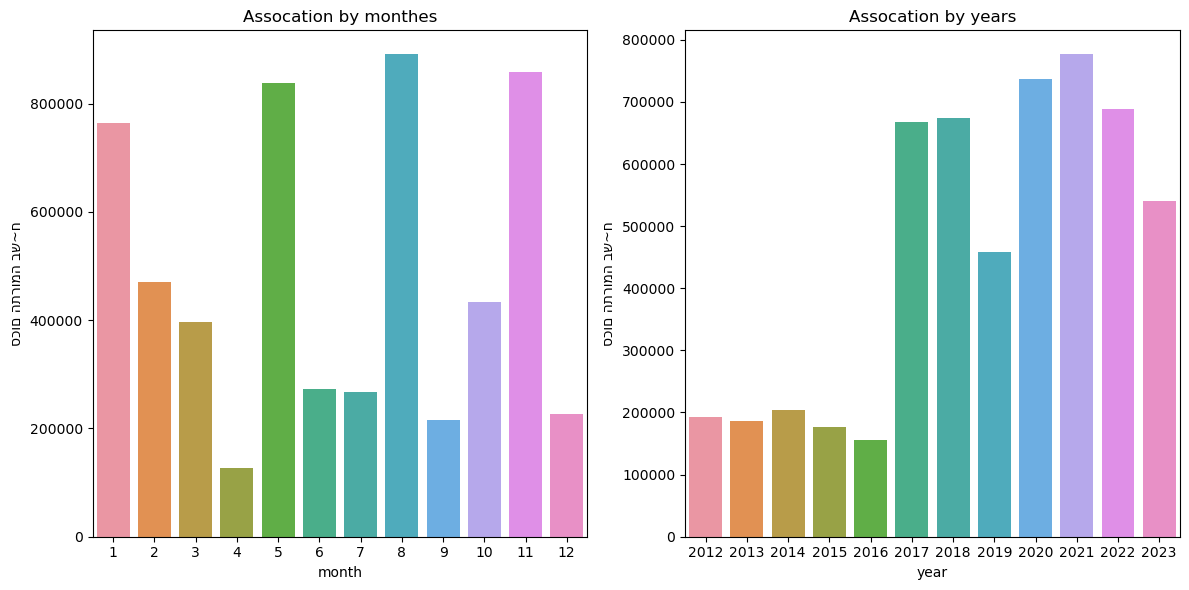

In [78]:
#  יצירת דאטא ללא 2024 שנה ו2 גרפים המראים כמו קודם את הכסף ע"פ שנים וחודשי השנה
DNT_NO_2024_DF=DNT_DF[DNT_DF['year'] != 2024] 

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=DNT_NO_2024_DF, y='סכום התרומה בש~ח', x='month', ax=ax1, errorbar=None)
ax1.set_title('Assocation by monthes')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=DNT_NO_2024_DF, y='סכום התרומה בש~ח', x='year', ax=ax2, errorbar=None)
ax2.set_title('Assocation by years')

plt.tight_layout()
plt.show()

 מסקנה נוספת בפרק 3- ע"פ גרפים אלו כשהוצאנו את שנת 2024 ראינו נקודות אחרות
 רואים בצורה יפה יותר את הפער בין השנים עד 2017 ומ2017. ומסקנה מעניינת לגבי החודשים, החודש השמיני הוא הנדיב ביותר אחריו ה11 ה5 ורק אח"כ ה1.
 עולה שכנראה ב2024 החודש הטוב ביותר הוא ה1 (אולי בגלל המלחמה), אבל בד"כ ישנם חודשים טובים בהם. וכדאי לנסות להתרים בהם.

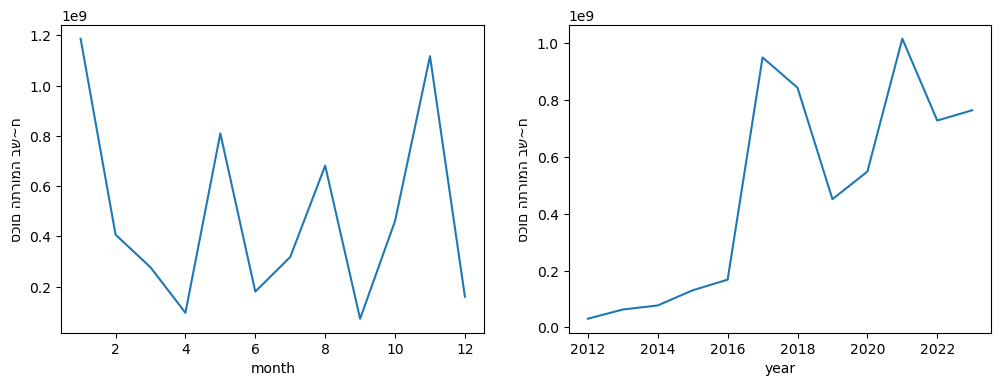

In [79]:
# עכשיו נציג זאת בגרף קווי על מנת לחדד את הקיצוניות שבפערים
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
sns.lineplot(x='month', y='סכום התרומה בש~ח',  data=DNT_NO_2024_DF,errorbar=None, estimator = sum, ax=axes[0])
sns.lineplot(x="year", y='סכום התרומה בש~ח',  data=DNT_NO_2024_DF,errorbar=None, estimator = sum, ax=axes[1])
plt.show()

### סיכום מסקנה 3
ערכנו השוואה בין החודשים והשנים הטובות ביותר לקבלת תרומה. מצאנו שינואר הוא החודש הטוב ביותר, וכן שנת 2024.
בודדנו את שנת 2024 ובדקנו למי תרמו הכי הרבה השנה- מצאנו שהיעדי תרומה לא בהכרח קשורים למצב במדינה (המלחמה).
לבסוף מצאנו שחוץ משנת 2024- החודשים הטובים ביותר לקבלת תרומה הם מאי ואוגוסט.

# תודה על ההקשבה :)